In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT

def getArrays(tree):

    chi2 = np.zeros(tree.GetEntries())
    dm2 = np.zeros(tree.GetEntries())
    sin22th = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        chi2[j] = tree.chi2
        dm2[j] = tree.dm2
        sin22th[j] = tree.sin22th
    
    return chi2, dm2, sin22th

def getContour(x,y,z,val):
    N=1000

    levels = [val]

    xi = np.linspace(x.min(), x.max(), N)
    yi = np.linspace(y.min(), y.max(), N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    cs = plt.contour(xi,yi,zi,levels, colors='black')
    
    p = cs.collections[0].get_paths()[0]
    v = p.vertices
    return v

Welcome to JupyROOT 6.18/04


In [2]:
c_90 = 'maroon'
c_99 = 'salmon'
c_95 = 'crimson'

cLSNDb = 'yellowgreen'
cLSND = 'olivedrab'

In [3]:
# Load up references
gallium=np.genfromtxt("limits/gallium_95.csv", delimiter=',')
karmen=np.genfromtxt("limits/karmen_95.csv", delimiter=',')
nomad=np.genfromtxt("limits/nomad_95.csv", delimiter=',')
numi=np.genfromtxt("limits/numi_95.csv", delimiter=',')
danss=np.genfromtxt("limits/danss_95.csv", delimiter=',')
cdhs=np.genfromtxt("limits/cdhs_95.csv", delimiter=',')
ccfr=np.genfromtxt("limits/ccfr_95.csv", delimiter=',')
lsnd1=np.genfromtxt("limits/LSND_1.csv", delimiter=',')
lsnd2=np.genfromtxt("limits/LSND_2.csv", delimiter=',')
lsnd3=np.genfromtxt("limits/LSND_3.csv", delimiter=',')
neos=np.genfromtxt("limits/neos_90.csv", delimiter=',')
mb_combined_99cl_1=np.genfromtxt("limits/mb_2020_99cl_1.csv", delimiter=',')
mb_combined_99cl_2=np.genfromtxt("limits/mb_2020_99cl_2.csv", delimiter=',')
mb_combined_99cl_3=np.genfromtxt("limits/mb_2020_99cl_3.csv", delimiter=',')
mb_combined_99cl_4=np.genfromtxt("limits/mb_2020_99cl_4.csv", delimiter=',')
mb_combined_90cl=np.genfromtxt("limits/mb_2020_90cl.csv", delimiter=',')
ic = np.genfromtxt('/home/dcianci/Physics/GlobalFits/IcecubePack/notebooks/ic90.txt')

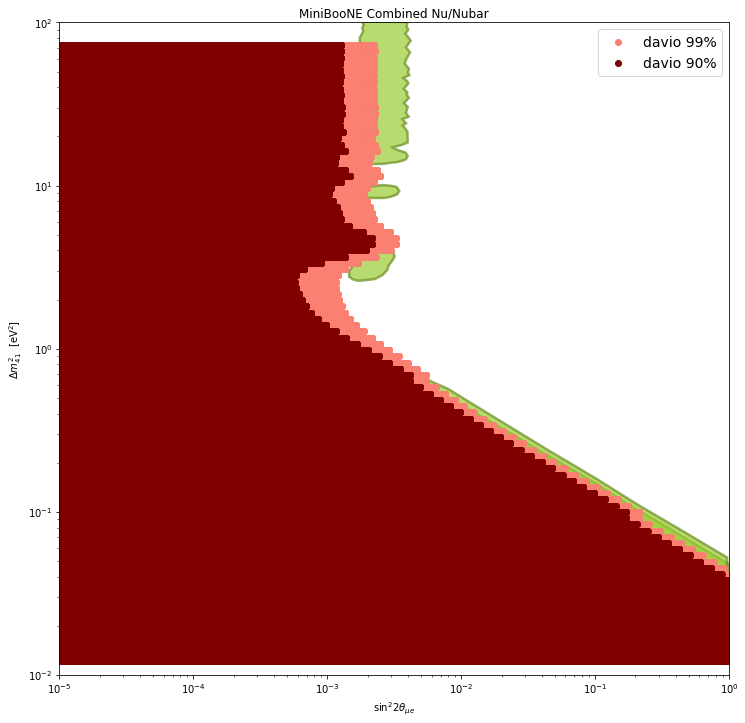

In [4]:
fig, ax = plt.subplots(figsize=(12,12))

# MB
f = ROOT.TFile("../build/mbtest_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)

plt.scatter(sin22th_99,dm2_99,c=c_99,label='davio 99%')
plt.scatter(sin22th_90,dm2_90,c=c_90,label='davio 90%')
#plt.scatter(mb_combined_99cl[:,0],mb_combined_99cl[:,1],color=cLSNDb,label='Ref 99%')
#plt.scatter(,color=cLSND,label='Ref 90%')


plt.fill(mb_combined_90cl[:,0],mb_combined_90cl[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7,zorder=-1)
plt.fill(mb_combined_99cl_1[:,0],mb_combined_99cl_1[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7,zorder=-1)
plt.fill(mb_combined_99cl_2[:,0],mb_combined_99cl_2[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7,zorder=-1)
plt.fill(mb_combined_99cl_3[:,0],mb_combined_99cl_3[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7,zorder=-1)
plt.fill(mb_combined_99cl_4[:,0],mb_combined_99cl_4[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7,zorder=-1)


plt.title("MiniBooNE Combined Nu/Nubar")
ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

AttributeError: 'TObject' object has no attribute 'GetEntries'

Error in <TFile::TFile>: file ../build/numi_jan31_test_plots.root does not exist


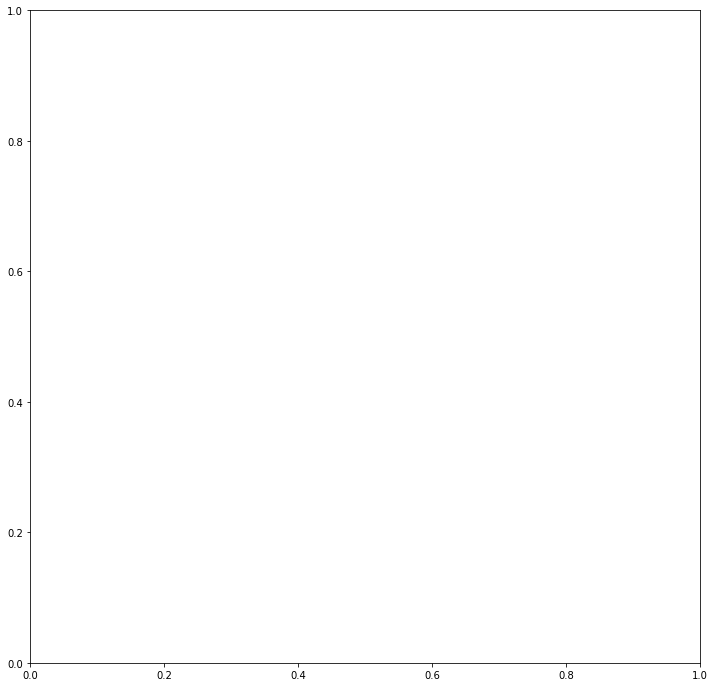

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
# NuMI
f = ROOT.TFile("../build/numi_jan31_test_plots.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95,label='davio 95% raster')
plt.scatter(numi[:,0],numi[:,1], color=cLSND, linewidth=2.5,  linestyle="-",alpha=0.7,label='ref 95% raster')

plt.title("NuMI")
ax.legend(fontsize=14)

tchi_c = f.Get("chiogram")
chi2_c, dm2_c, sin22th_c = getArrays(tchi_c)
plt.scatter(sin22th_c,dm2_c,c=chi2_c,zorder=-1)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [13]:
x = nomad[:,0]
y = nomad[:,1]
print(x)
print()

[0.00122284 0.00121335 0.00123167 0.00125403 0.00125403 0.00128447
 0.00127679 0.00131722 0.00131564 0.00132356 0.0013492  0.00135568
 0.00139694 0.0014138  0.00143085 0.00146734 0.00148505 0.00151927
 0.00154221 0.00157681 0.00159392 0.00163261 0.00165231 0.00165231
 0.00167224 0.00167425 0.00171489 0.00172313 0.0017335  0.00175441
 0.00176496 0.00176496 0.00181868 0.00190804 0.00200179 0.00210016
 0.00220335 0.00231162 0.0024252  0.00254437 0.00266939 0.00280055
 0.00293816 0.00308254 0.003234   0.00339291 0.00355963 0.00373453
 0.00391804 0.00411056 0.00431254 0.00452444 0.00474676 0.00498
 0.0052247  0.00548142 0.00575076 0.00603333 0.00632979 0.00664082
 0.00696712 0.00730947 0.00766863 0.00804544 0.00844077 0.00885552
 0.00929065 0.00974716 0.0102261  0.01072858 0.01125575 0.01180882
 0.01238906 0.01299782 0.01363649 0.01430654 0.01500952 0.01574704
 0.0165208  0.01733258 0.01818424 0.01907775 0.02001517 0.02099865
 0.02203046 0.02311296 0.02424866 0.02544016 0.0266902  0.0280016

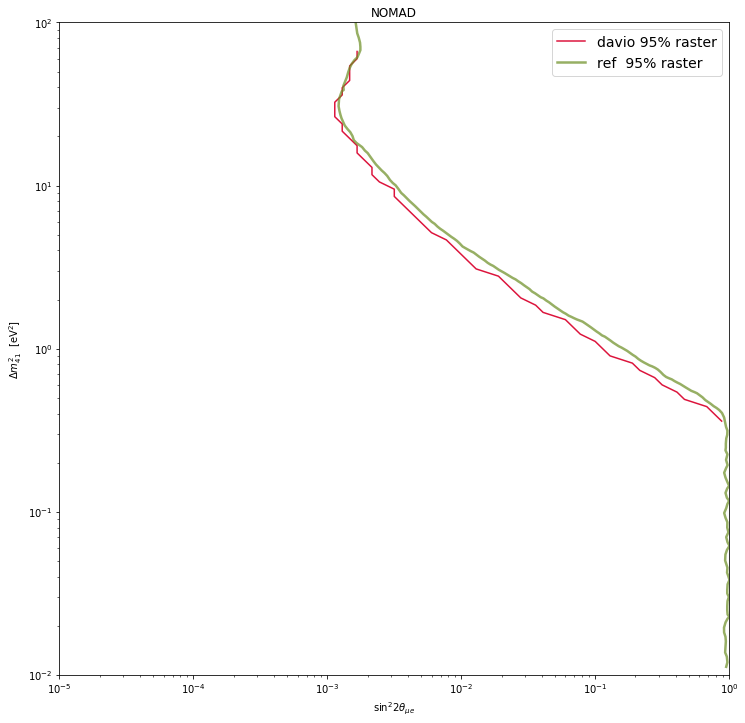

In [17]:
fig, ax = plt.subplots(figsize=(12,12))

# NOMAD
f = ROOT.TFile("../Oct2020/validation/nomad_val_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95,label='davio 95% raster')
refx = nomad[:,0]
refy = nomad[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=cLSND, linewidth=2.5,  linestyle="-",alpha=0.7,label='ref  95% raster')
ax.legend(fontsize=14)
plt.title("NOMAD")


plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

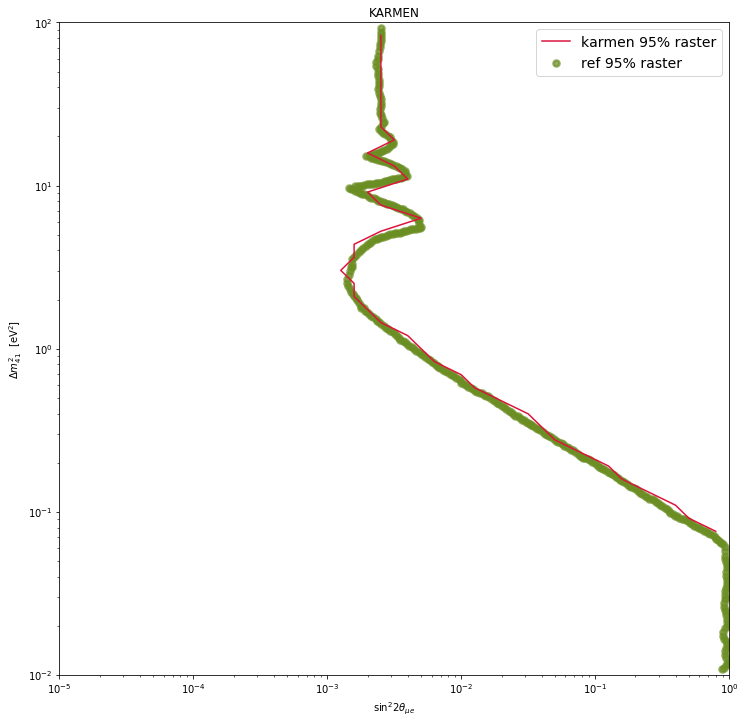

In [11]:
fig, ax = plt.subplots(figsize=(12,12))


# Karmen
f = ROOT.TFile("../build/jan28_karmen_proc.root")
tchi_95 = f.Get("nueapp_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95,label='karmen 95% raster')
plt.scatter(karmen[:,0],karmen[:,1], color=cLSND, linewidth=2.5,  linestyle="-",alpha=0.7,label='ref 95% raster')

plt.title("KARMEN")
ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

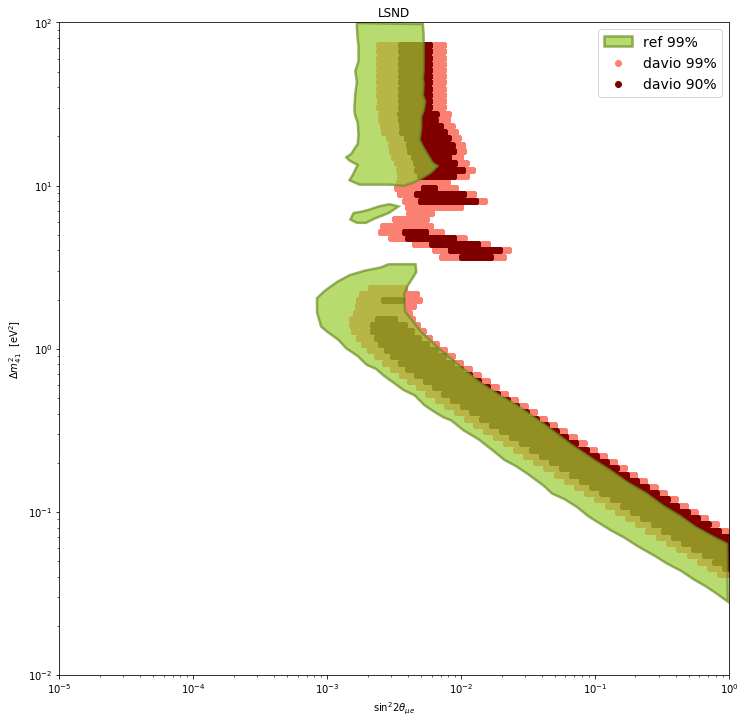

In [13]:
fig, ax = plt.subplots(figsize=(12,12))


# LSND
f = ROOT.TFile("../build/lsnd_feb1_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.fill(lsnd1[:,0],lsnd1[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5, linestyle="-",alpha=0.7,label='ref 99%')
plt.fill(lsnd2[:,0],lsnd2[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7)
plt.fill(lsnd3[:,0],lsnd3[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7)
plt.scatter(sin22th_99,dm2_99,c=c_99,label='davio 99%')
plt.scatter(sin22th_90,dm2_90,c=c_90,label='davio 90%')
    
    
plt.title("LSND")
ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

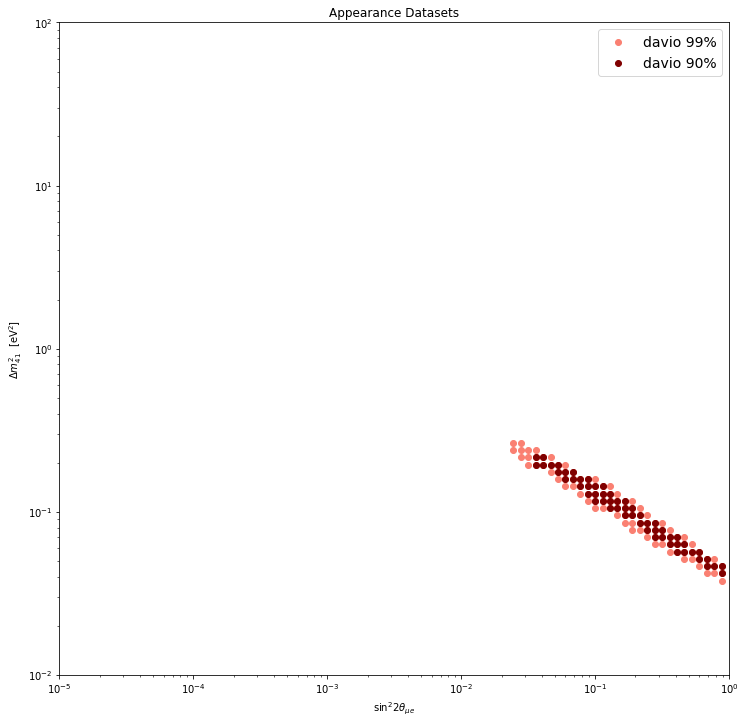

In [23]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../build/appearance_feb1_proc.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_99,dm2_99,c=c_99,label='davio 99%')
plt.scatter(sin22th_90,dm2_90,c=c_90,label='davio 90%')
plt.title("Appearance Datasets")
ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

# Nue dis

No handles with labels found to put in legend.


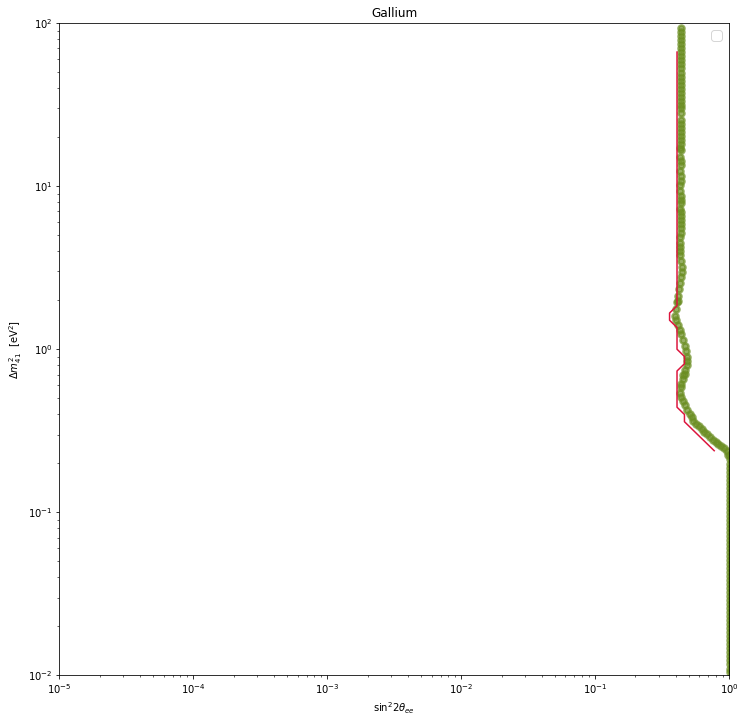

In [24]:
fig, ax = plt.subplots(figsize=(12,12))

# Gallium
f = ROOT.TFile("../build/gallium_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95)
plt.scatter(gallium[:,0],gallium[:,1], color=cLSND, linewidth=2.5,  linestyle="-",alpha=0.7)
plt.title("Gallium")

ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{e e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

No handles with labels found to put in legend.


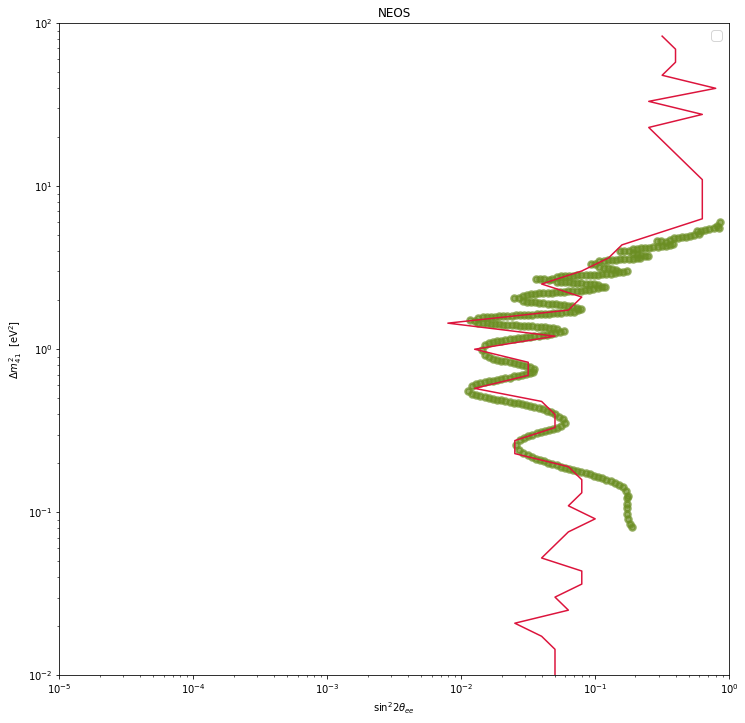

In [20]:
fig, ax = plt.subplots(figsize=(12,12))

# Neos
f = ROOT.TFile("../build/jan28_neos_EEproc.root")
tchi_95 = f.Get("nuedis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95)
plt.scatter(neos[:,0],neos[:,1], color=cLSND, linewidth=2.5,linestyle="-", alpha=0.7)
plt.title("NEOS")

ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{e e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

No handles with labels found to put in legend.


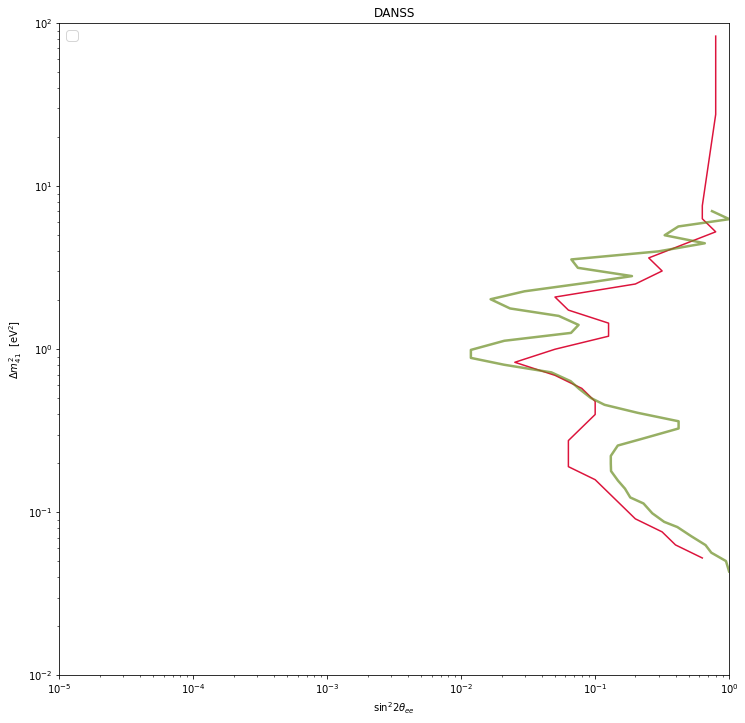

In [17]:
fig, ax = plt.subplots(figsize=(12,12))

# DANSS
f = ROOT.TFile("../build/jan28_danss_EEproc.root")
tchi_95 = f.Get("nuedis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95)
plt.plot(danss[:,0],danss[:,1], color=cLSND, linewidth=2.5,linestyle="-", alpha=0.7)
plt.title("DANSS")

ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{e e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

No handles with labels found to put in legend.


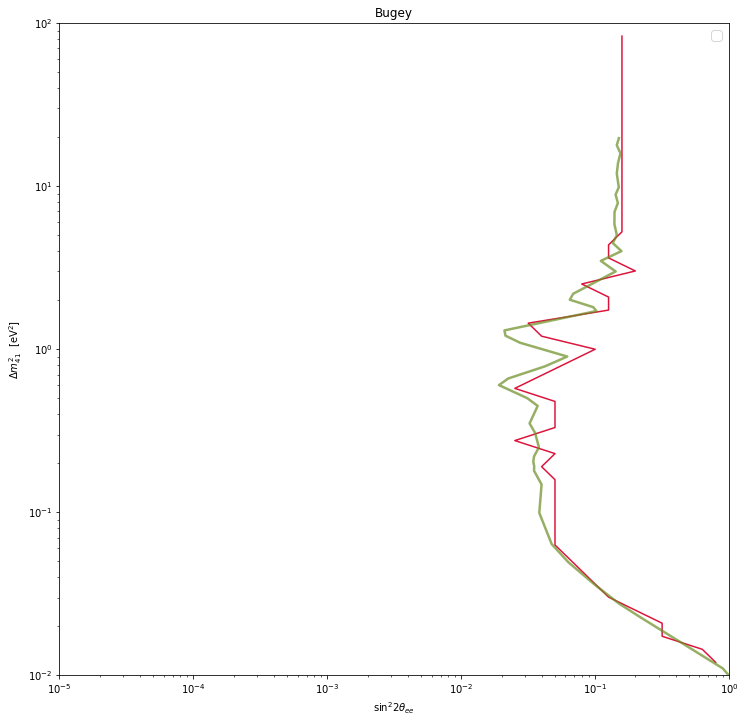

In [18]:
fig, ax = plt.subplots(figsize=(12,12))

# Bugey
f = ROOT.TFile("../build/jan28_bugey_EEproc.root")
tchi_95 = f.Get("nuedis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95)

bugey=np.genfromtxt("limits/bugey_90.csv", delimiter=',')
plt.plot(bugey[:,0],bugey[:,1], color=cLSND, linewidth=2.5,linestyle="-", alpha=0.7)



plt.title("Bugey")


ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{e e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

No handles with labels found to put in legend.


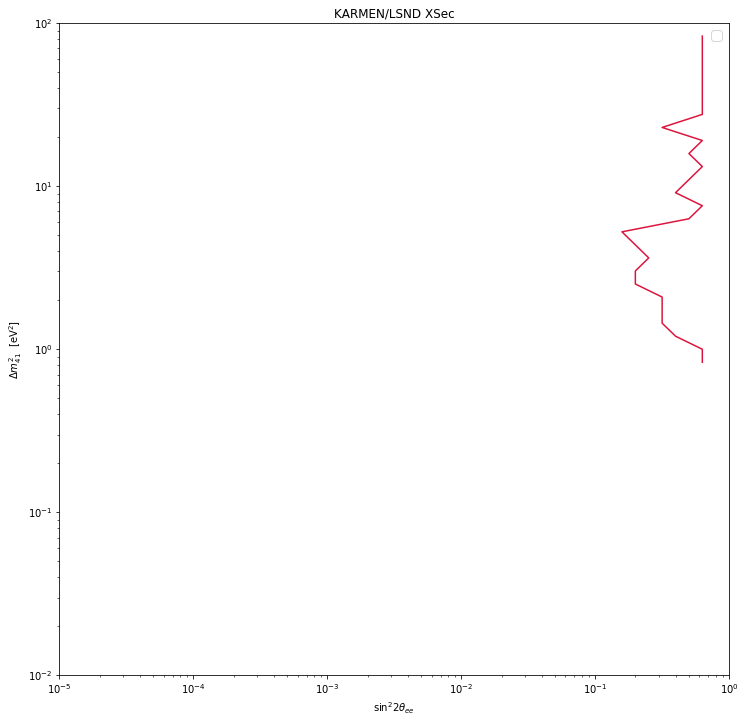

In [19]:
fig, ax = plt.subplots(figsize=(12,12))

# XSEC
f = ROOT.TFile("../build/jan28_xsec_EEproc.root")
tchi_95 = f.Get("nuedis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95)
plt.title("KARMEN/LSND XSec")

ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{e e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

No handles with labels found to put in legend.


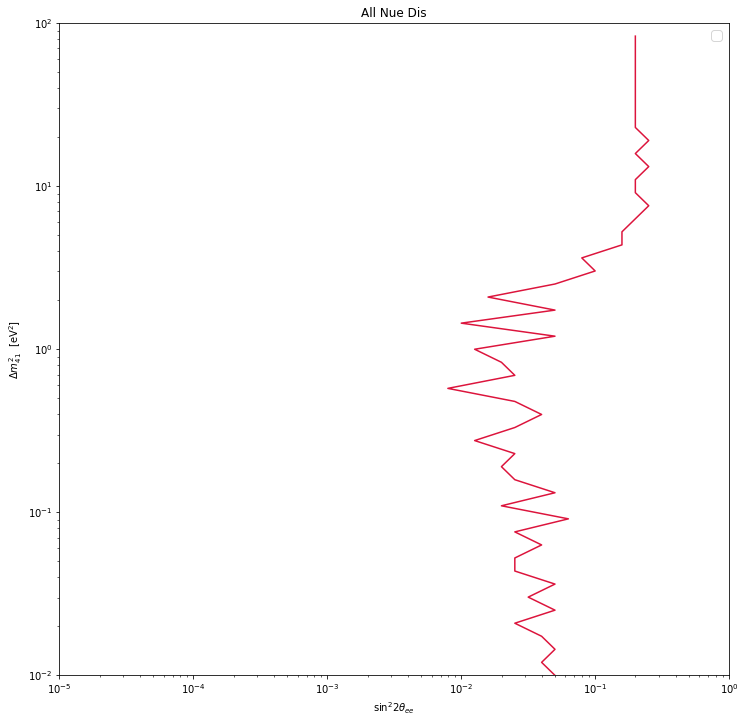

In [13]:
fig, ax = plt.subplots(figsize=(12,12))

# Nue Dis
f = ROOT.TFile("../Oct2020/AllNueDis_EEproc.root")
tchi_95 = f.Get("nuedis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95)
plt.title("All Nue Dis")

ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{e e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

# Numu Disappearance

No handles with labels found to put in legend.


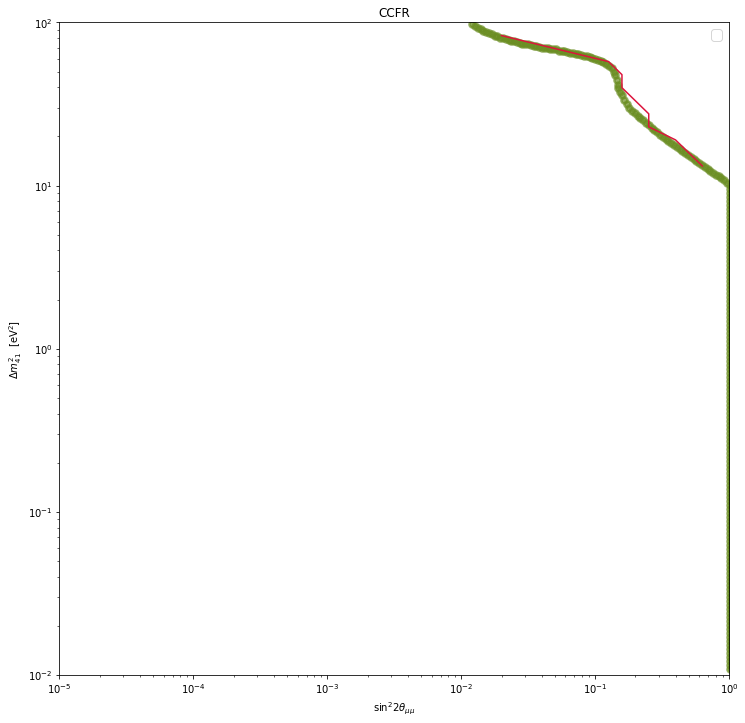

In [18]:
fig, ax = plt.subplots(figsize=(12,12))

# CCFR
f = ROOT.TFile("../build/ccfr_.root")
tchi_95 = f.Get("numudis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95)
plt.scatter(ccfr[:,0],ccfr[:,1], color=cLSND, linewidth=2.5,  linestyle="-",alpha=0.7)
plt.title("CCFR")

ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

No handles with labels found to put in legend.


[ 0.26437612  0.29286446  0.32442261  0.35938137  0.39810718  0.44100595
  0.48852737  0.54116954  0.59948426  0.6640828   0.73564227  0.81491276
  0.90272519  1.00000001  1.10775687  1.22712526  1.35935641  1.50583637
  1.66810056  1.84784982  2.0469683   2.26754315  2.51188646  2.78255943
  3.08239927  3.41454891  3.78248995  4.19007915  4.64158888  5.14175188
  5.69581086  6.3095735   6.98947327  7.74263689  8.57695905  9.50118515
 10.52500293 11.65914409 12.91549674 14.30722998 15.84893202 17.55676301
 19.44862449 21.54434701 23.86589798 26.43761197 29.28644576 32.44226091
 35.93813676 39.81071717 44.10059466 48.85273583 54.11695276 59.94842513
 66.40827859]


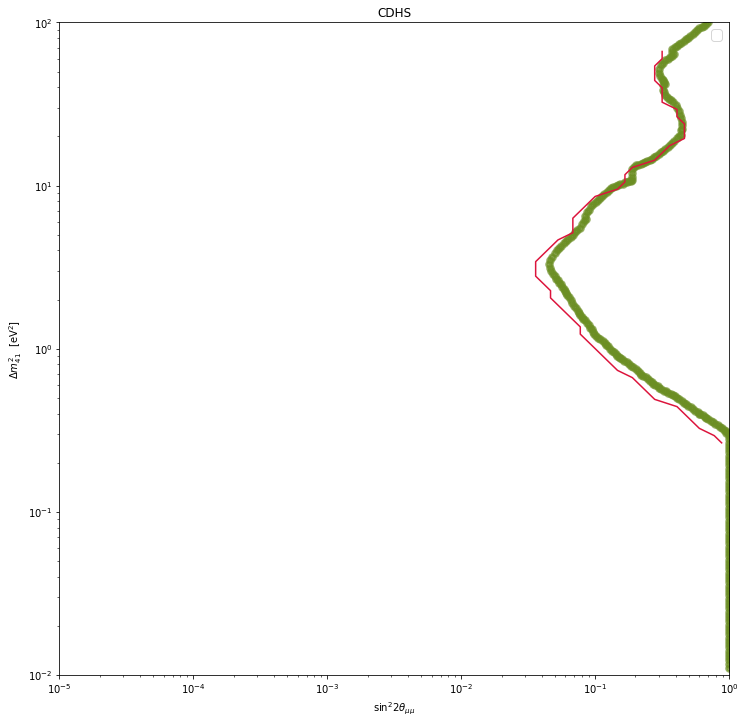

In [22]:
fig, ax = plt.subplots(figsize=(12,12))

# CDHS
f = ROOT.TFile("../build/cdhs_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95)
plt.scatter(cdhs[:,0],cdhs[:,1], color=cLSND, linewidth=2.5,  linestyle="-",alpha=0.7)
plt.title("CDHS")

print(dm2_95)

ax.legend(fontsize=14)


plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

AttributeError: 'TObject' object has no attribute 'GetEntries'

Error in <TFile::TFile>: file ../build/jan28_mbnudis_MUMUproc.root does not exist


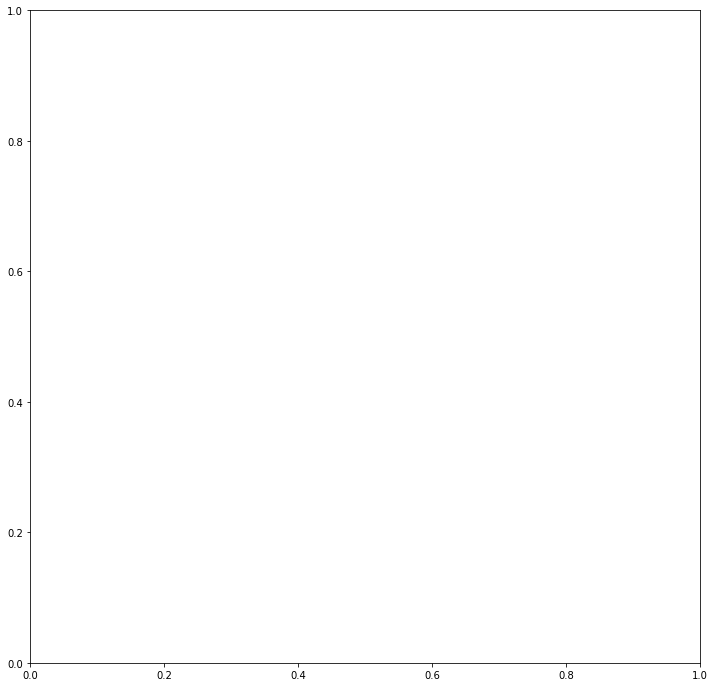

In [32]:
fig, ax = plt.subplots(figsize=(12,12))

# MB Dis nubar
f = ROOT.TFile("../build/jan28_mbnudis_MUMUproc.root")
tchi_c = f.Get("chiogram")
chi2_c, dm2_c, sin22th_c = getArrays(tchi_c)
plt.title("MB Dis ")

getContour(sin22th_c,dm2_c,chi2_c,23.5+13)

mbdisnubar=np.genfromtxt("limits/mbnudis_90.csv", delimiter=',')
plt.scatter(mbdisnubar[:,0],mbdisnubar[:,1], color=cLSND, linewidth=2.5,linestyle="-", alpha=0.7)

ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

No handles with labels found to put in legend.


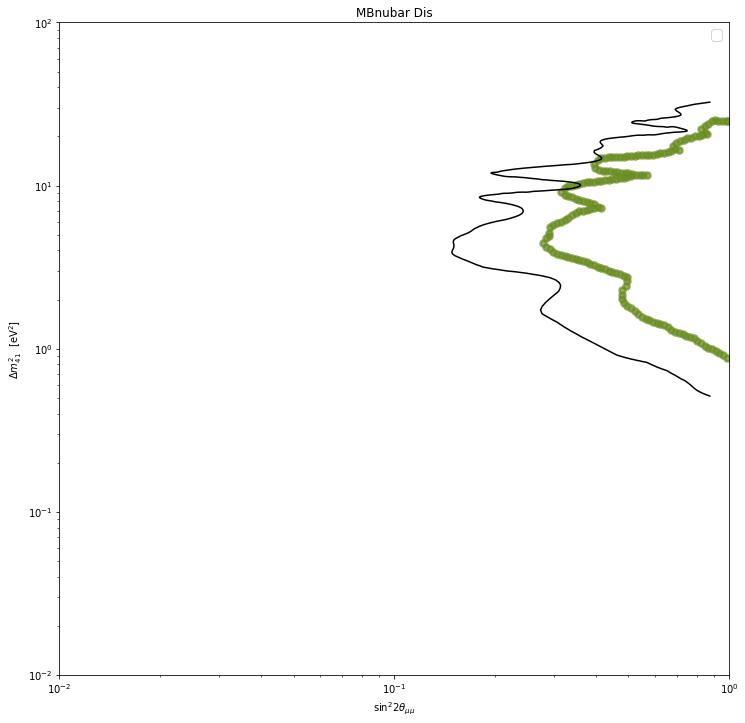

In [34]:
fig, ax = plt.subplots(figsize=(12,12))

# MB Dis Nu
f = ROOT.TFile("../build/MBnubar_dis_proc_v1.root")
tchi_c = f.Get("numudis_chiogram")
chi2_c, dm2_c, sin22th_c = getArrays(tchi_c)
plt.title("MBnubar Dis")

getContour(sin22th_c,dm2_c,chi2_c,23.5+7.6)

mbdisnu=np.genfromtxt("limits/mbnubardis_90.csv", delimiter=',')
plt.scatter(mbdisnu[:,0],mbdisnu[:,1], color=cLSND, linewidth=2.5,linestyle="-", alpha=0.7)

ax.legend(fontsize=14)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [30]:
chi2_c[chi2_c==0]=999
print(min(chi2_c))

7.616559028625488


# Global

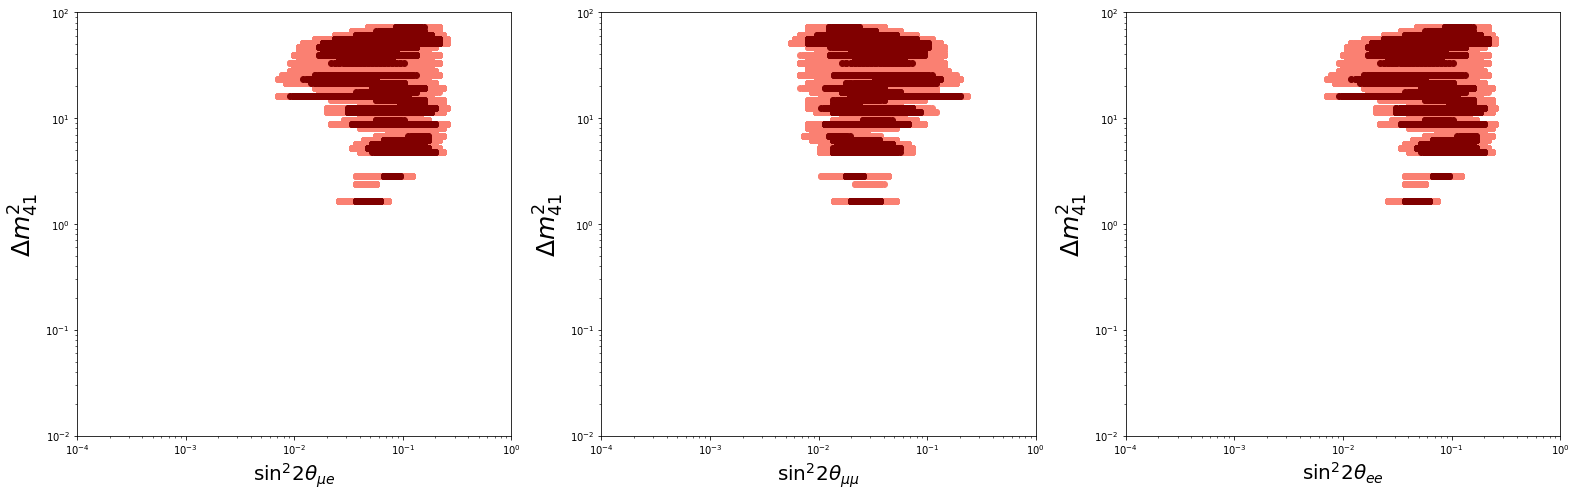

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22,7))
axes = axes.flatten()

titlesize = 30
labelsize = 20

for ax in axes:
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    plt.axes(ax)
    ax.set_ylabel(r'$\Delta m_{41}^2$',fontsize=25)
    
    plt.xlim(1e-4,1)
    plt.ylim(0.01,100)

f = ROOT.TFile("../build/global_feb1_proc.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.axes(axes[0])
axes[0].set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=labelsize)
plt.scatter(sin22th_99,dm2_99,c=c_99,label='davio 99%')
plt.scatter(sin22th_90,dm2_90,c=c_90,label='davio 90%')

tchi_99 = f.Get("numudis_99")
tchi_90 = f.Get("numudis_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.axes(axes[1])
axes[1].set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=labelsize)
plt.scatter(sin22th_99,dm2_99,c=c_99,label='davio 99%')
plt.scatter(sin22th_90,dm2_90,c=c_90,label='davio 90%')

tchi_99 = f.Get("nuedis_99")
tchi_90 = f.Get("nuedis_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.axes(axes[2])
axes[2].set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=labelsize)
plt.scatter(sin22th_99,dm2_99,c=c_99,label='davio 99%')
plt.scatter(sin22th_90,dm2_90,c=c_90,label='davio 90%')



fig.tight_layout()

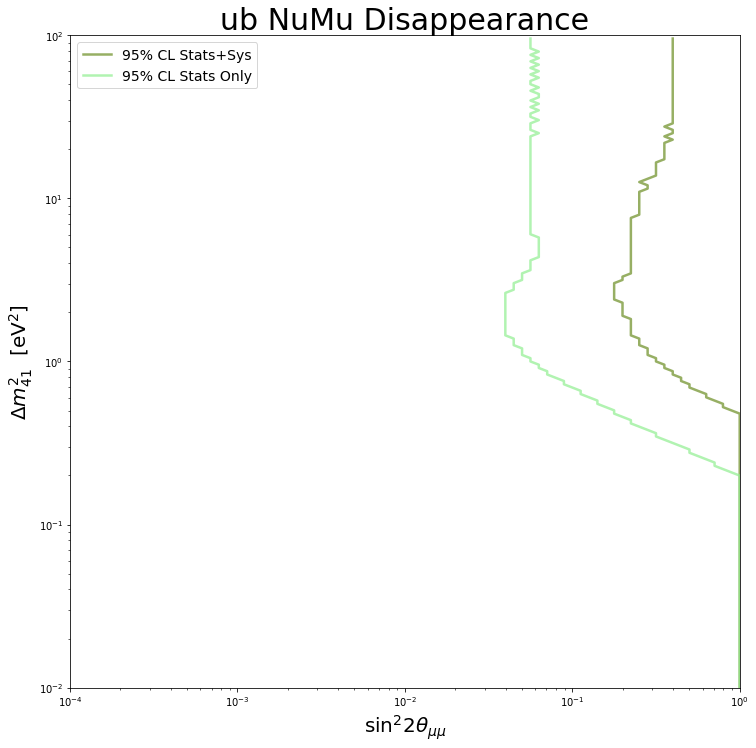

In [6]:
fig, ax = plt.subplots(figsize=(12,12))

plt.title("ub NuMu Disappearance",fontsize=30)

ubdisnu=np.genfromtxt("raster95_sens_jan25.txt")
plt.plot(ubdisnu[:,2],ubdisnu[:,1], color=cLSND, linewidth=2.5,linestyle="-", alpha=0.7,label='95% CL Stats+Sys')

ubdisnu=np.genfromtxt("raster95_statsonly_sens_jan25.txt")
plt.plot(ubdisnu[:,2],ubdisnu[:,1], color='lightgreen', linewidth=2.5,linestyle="-", alpha=0.7,label='95% CL Stats Only')


ax.legend(fontsize=14)

plt.xlim(1e-4,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')



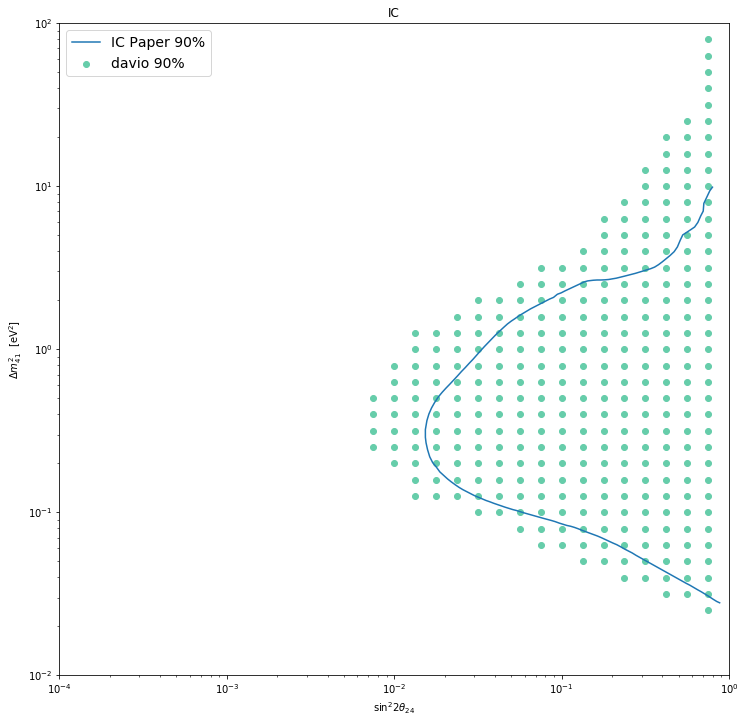

In [17]:
fig, ax = plt.subplots(figsize=(12,12))

# IC
#f = ROOT.TFile("../Oct2020/validation/ic_val_feb4_proc_v1.root")
f = ROOT.TFile("../Oct2020/IC_val_jan12_MUMUproc.root")
tchi_90 = f.Get("numudis_90_excl")
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_90,dm2_90,c='mediumaquamarine',label='davio 90%')

plt.plot(ic[:,0],ic[:,1],label="IC Paper 90%")




plt.title("IC")

ax.legend(fontsize=14)

plt.xlim(1e-4,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{24}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

No handles with labels found to put in legend.


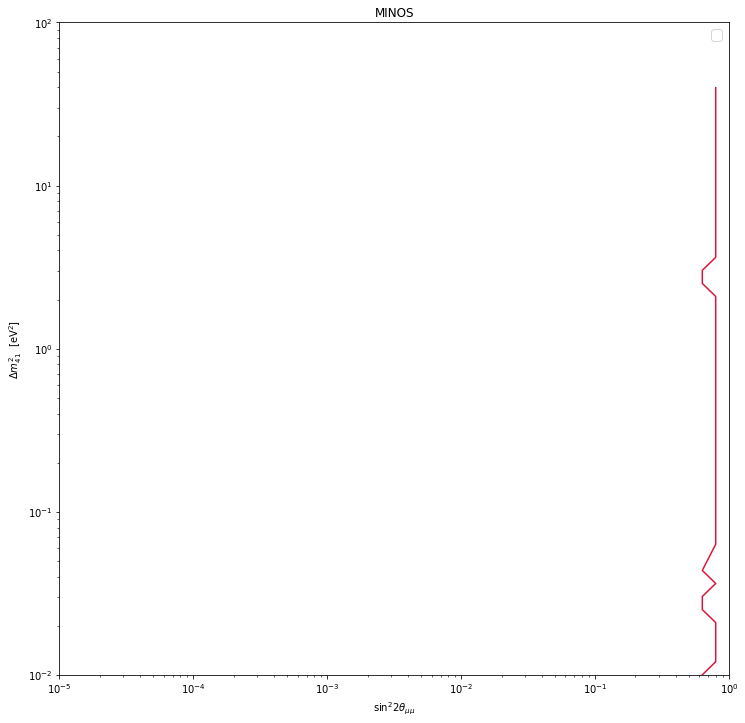

In [65]:
fig, ax = plt.subplots(figsize=(12,12))

# MINOS
f = ROOT.TFile("../build/MINOS_MUMUproc.root")
tchi_95 = f.Get("numudis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c=c_95)
plt.title("MINOS")

ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

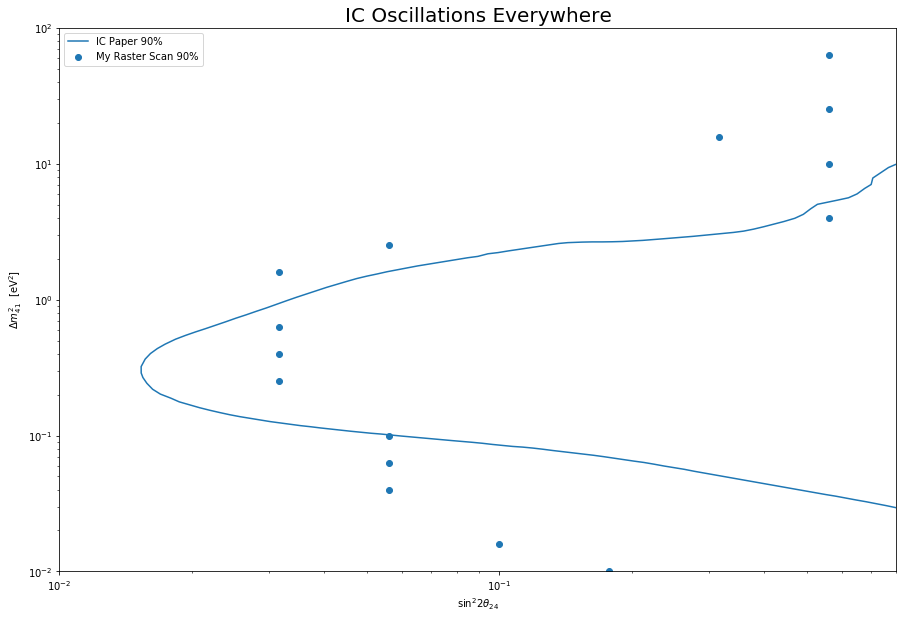

In [15]:
raster = np.genfromtxt('../build/raster_ic.txt')
ic = np.genfromtxt('/home/dcianci/Physics/GlobalFits/IcecubePack/notebooks/ic90.txt')

fig,ax = plt.subplots(figsize=(15,10))

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_xlabel(r'$\sin^2 2 \theta_{24}$')
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')

plt.xlim(.01,.8)
plt.ylim(0.01,100)

ax.set_title("IC Oscillations Everywhere",fontsize=20)
plt.scatter(raster[:,1],raster[:,2],label="My Raster Scan 90%")
plt.plot(ic[:,0],ic[:,1],label="IC Paper 90%")
plt.legend()

# Hypervolume Test

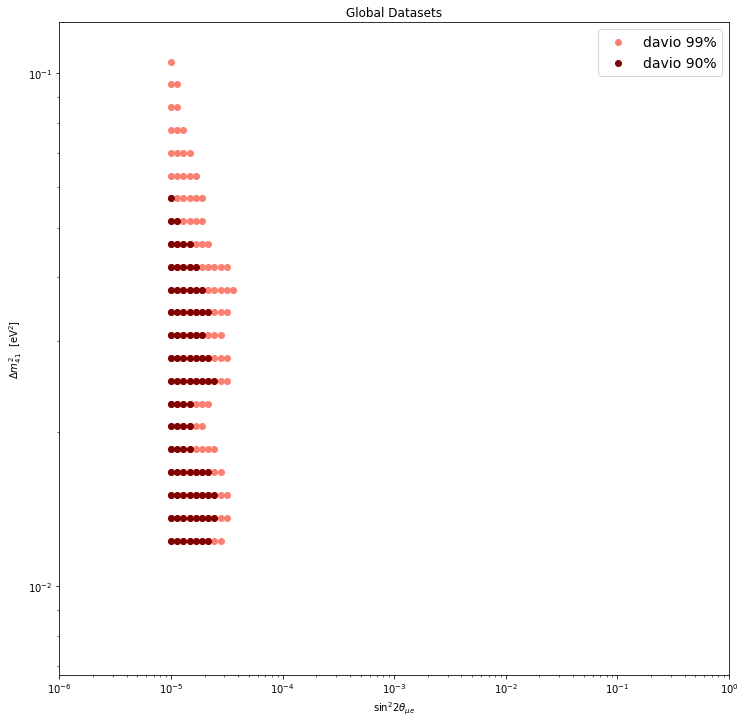

In [34]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../build/global_feb1_proc.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_99,dm2_99,c=c_99,label='davio 99%')
plt.scatter(sin22th_90,dm2_90,c=c_90,label='davio 90%')
plt.title("Global Datasets")
ax.legend(fontsize=14)


tchi_c = f.Get("chiogram_nueapp")
chi2_c, dm2_c, sin22th_c = getArrays(tchi_c)
#plt.scatter(sin22th_c,dm2_c, c=np.log10(chi2_c))

plt.xlim(1e-6,1)
#plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

Text(0, 0.5, '$\\Delta m_{41}^2$  [eV$^2$]')

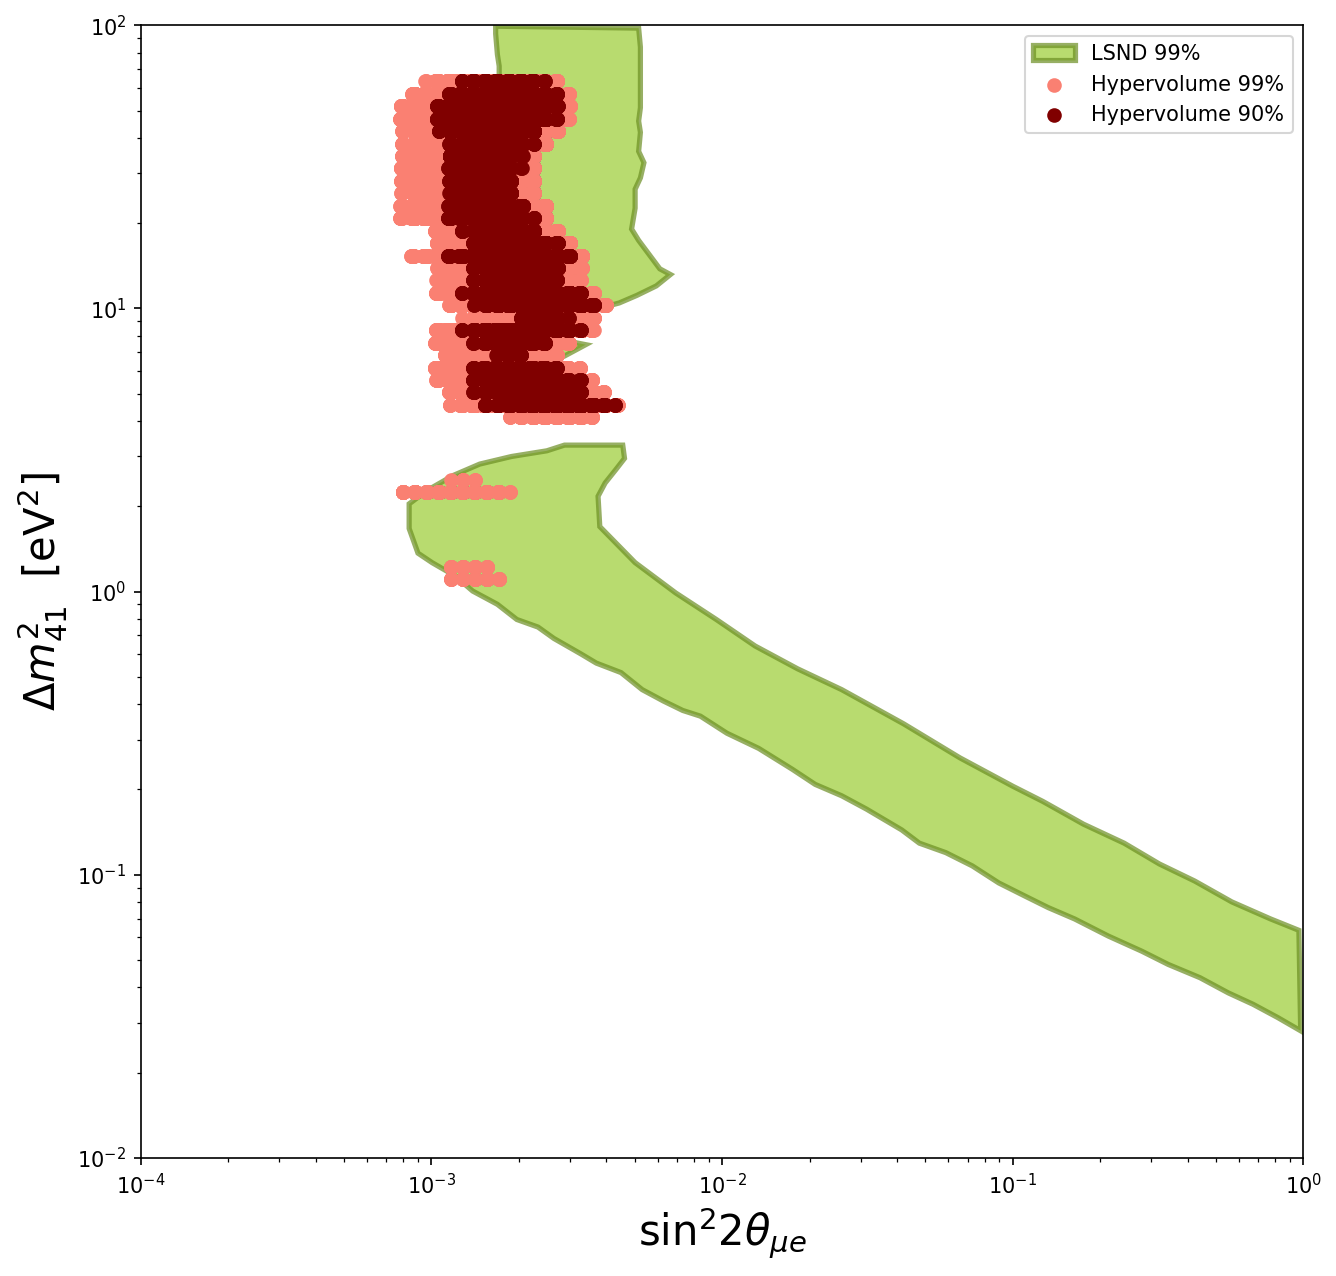

In [5]:
df_nt_90 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_90CL')
df_nt_99 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_99CL')

y = np.power(df_nt_99['m41'].values,2)
x = np.power(np.sin(2*df_nt_99['theta24'].values),2)*np.power(np.sin(2*df_nt_99['theta14'].values),2)

y1 = np.power(df_nt_90['m41'].values,2)
x1 = np.power(np.sin(2*df_nt_90['theta24'].values),2)*np.power(np.sin(2*df_nt_90['theta14'].values),2)


f=plt.figure(figsize=(10,10), dpi=150)
ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_ylim(.01,100.0)
ax.set_xlim(.0001,1)

#Draw LSND from paper
plt.fill(lsnd1[:,0],lsnd1[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5, linestyle="-",alpha=0.7, zorder=0,label='LSND 99%')
plt.fill(lsnd2[:,0],lsnd2[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7, zorder=0)
plt.fill(lsnd3[:,0],lsnd3[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7, zorder=0)


# plt.scatter(mb_combined_99cl[:,0],mb_combined_99cl[:,1],color='cornflowerblue',label='MB 99%')
# plt.scatter(mb_combined_90cl[:,0],mb_combined_90cl[:,1],color='slateblue',label='MB 90%')


plt.scatter(x,y,label='Hypervolume 99%',color=c_99)
plt.scatter(x1,y1,label='Hypervolume 90%',color=c_90)

ax.legend()

ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=20)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)

Text(0, 0.5, '$m_{\\nu}$')

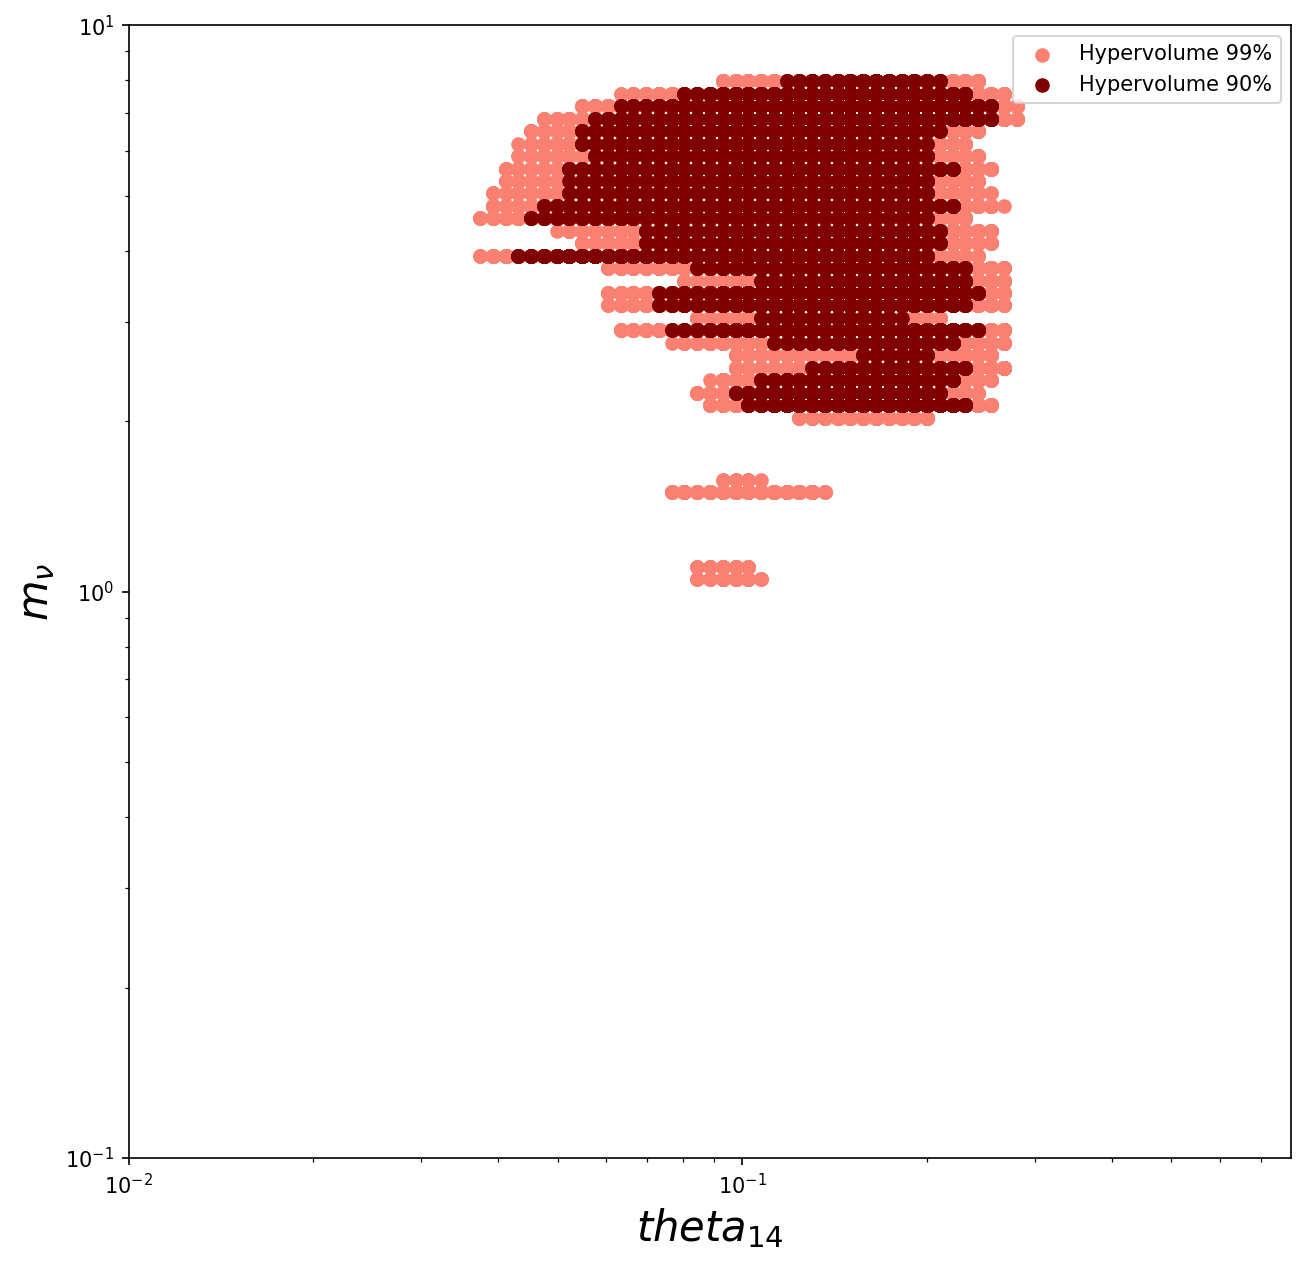

In [6]:
df_nt_90 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_90CL')
df_nt_99 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_99CL')

y = df_nt_99['m41']
x = df_nt_99['theta14']

y1 = df_nt_90['m41']
x1 = df_nt_90['theta14']


f=plt.figure(figsize=(10,10), dpi=150)
ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_ylim(.1,10.0)
ax.set_xlim(.01,np.pi/4)

# plt.scatter(mb_combined_99cl[:,0],mb_combined_99cl[:,1],color='cornflowerblue',label='MB 99%')
# plt.scatter(mb_combined_90cl[:,0],mb_combined_90cl[:,1],color='slateblue',label='MB 90%')


plt.scatter(x,y,label='Hypervolume 99%',color=c_99)
plt.scatter(x1,y1,label='Hypervolume 90%',color=c_90)

ax.legend()

# ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=20)
# ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)

ax.set_xlabel(r'$theta_{14}$',fontsize=20)
ax.set_ylabel(r'$m_{\nu}$',fontsize=20)

Text(0, 0.5, '$theta_{14}$')

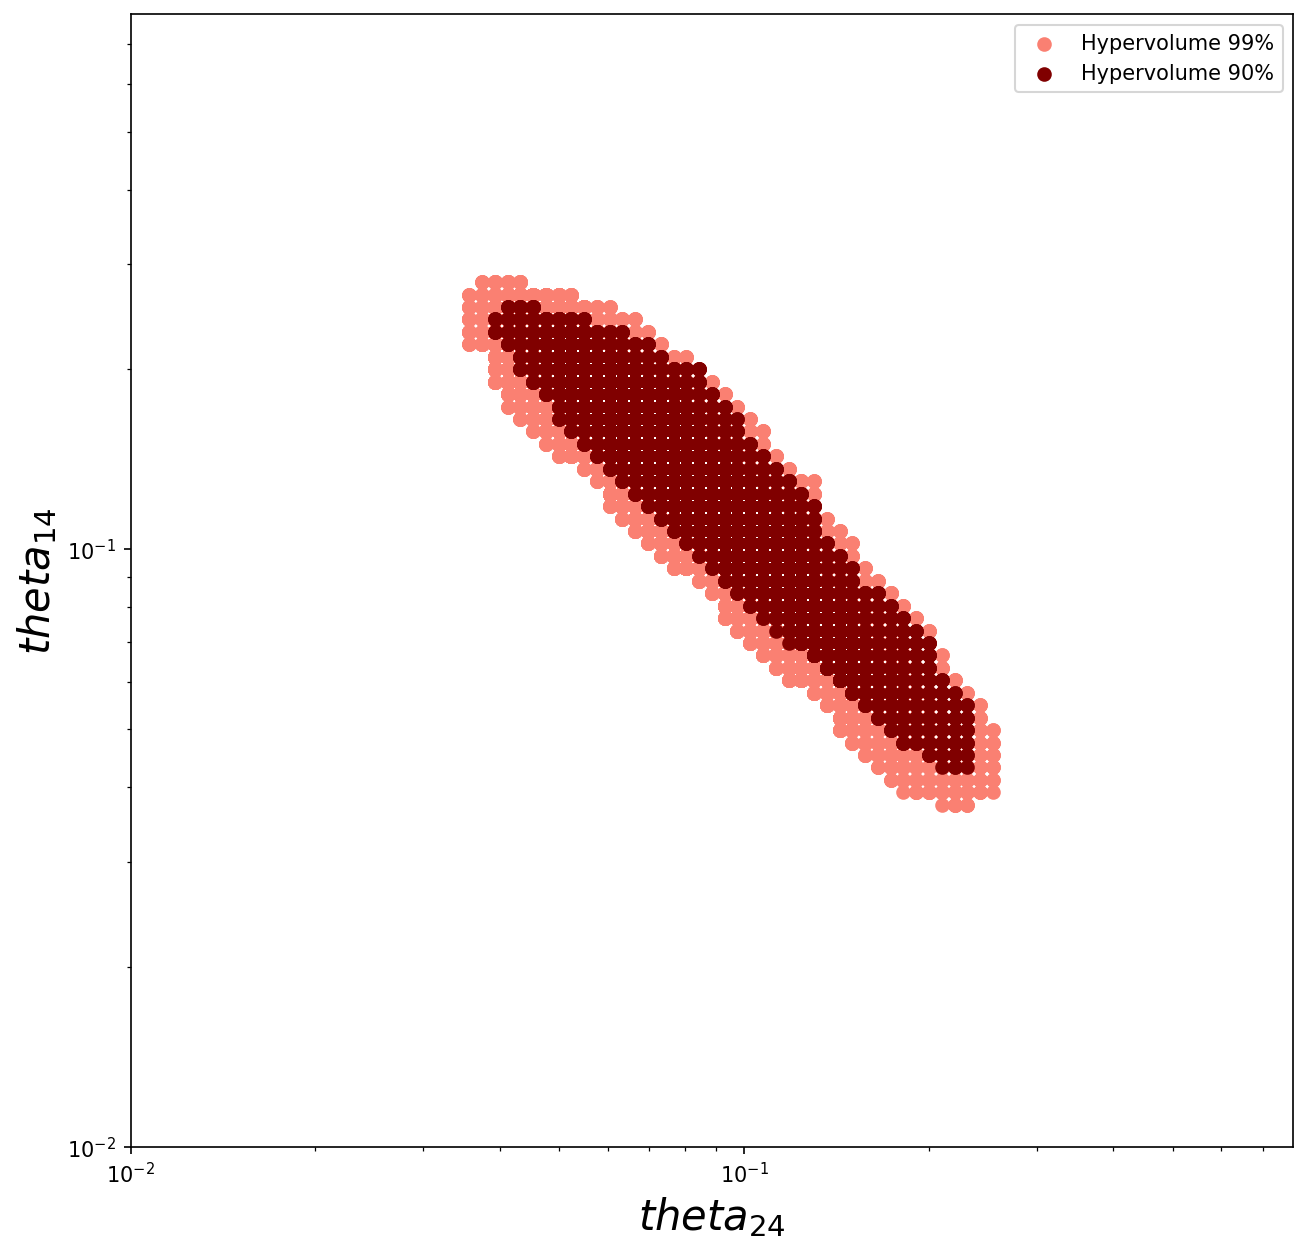

In [7]:
df_nt_90 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_90CL')
df_nt_99 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_99CL')

y = df_nt_99['theta14']
x = df_nt_99['theta24']

y1 = df_nt_90['theta14']
x1 = df_nt_90['theta24']


f=plt.figure(figsize=(10,10), dpi=150)
ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_ylim(0.01,np.pi/4)
ax.set_xlim(.01,np.pi/4)

# plt.scatter(mb_combined_99cl[:,0],mb_combined_99cl[:,1],color='cornflowerblue',label='MB 99%')
# plt.scatter(mb_combined_90cl[:,0],mb_combined_90cl[:,1],color='slateblue',label='MB 90%')


plt.scatter(x,y,label='Hypervolume 99%',color=c_99)
plt.scatter(x1,y1,label='Hypervolume 90%',color=c_90)

ax.legend()

# ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=20)
# ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)

ax.set_xlabel(r'$theta_{24}$',fontsize=20)
ax.set_ylabel(r'$theta_{14}$',fontsize=20)

Text(0, 0.5, '$\\Delta m_{41}^2$  [eV$^2$]')

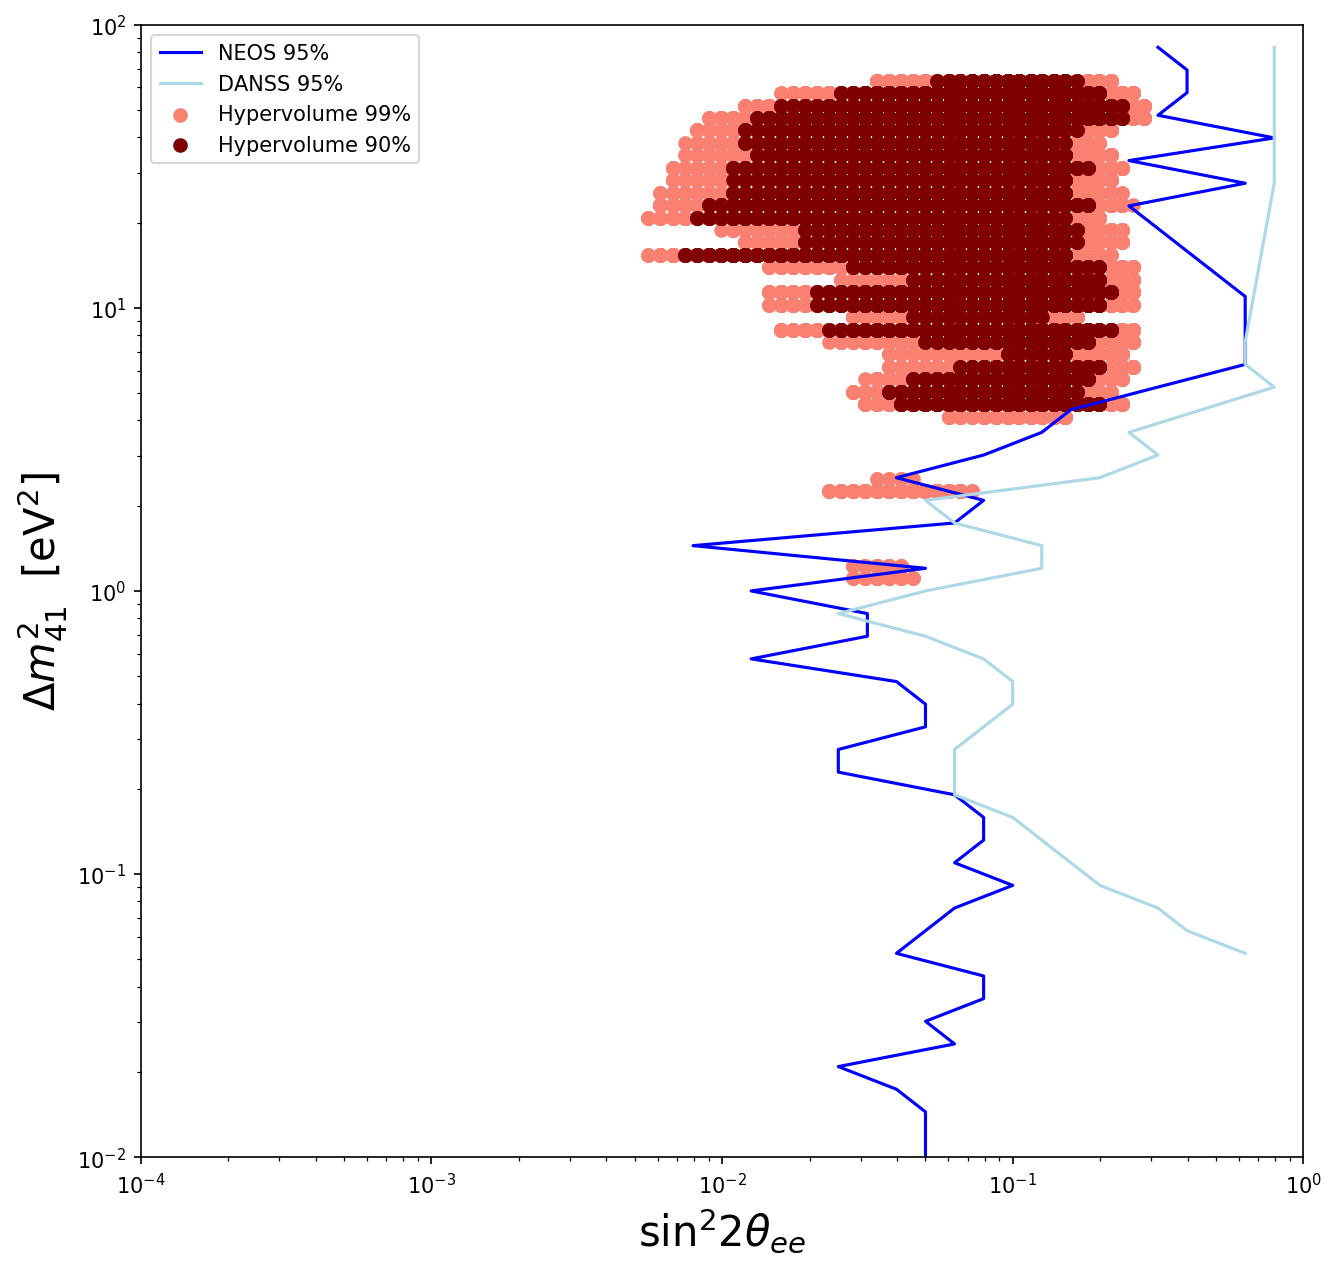

In [11]:
df_nt_90 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_90CL')
df_nt_99 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_99CL')

y = np.power(df_nt_99['m41'].values,2)
x = np.power(np.sin(2*df_nt_99['theta14'].values),2)

y1 = np.power(df_nt_90['m41'].values,2)
x1 = np.power(np.sin(2*df_nt_90['theta14'].values),2)

f=plt.figure(figsize=(10,10), dpi=150)
ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_ylim(.01,100.0)
ax.set_xlim(.0001,1)

plt.scatter(x,y,label='Hypervolume 99%',color=c_99)
plt.scatter(x1,y1,label='Hypervolume 90%',color=c_90)


f = ROOT.TFile("../build/jan28_neos_EEproc.root")
tchi_95 = f.Get("nuedis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c='blue',label='NEOS 95%')

f = ROOT.TFile("../build/jan28_danss_EEproc.root")
tchi_95 = f.Get("nuedis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, c='lightblue',label='DANSS 95%')

ax.legend()

ax.set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=20)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)

AttributeError: 'TObject' object has no attribute 'GetEntries'

Error in <TFile::TFile>: file ../build/jan28_ic_MUMUproc.root does not exist


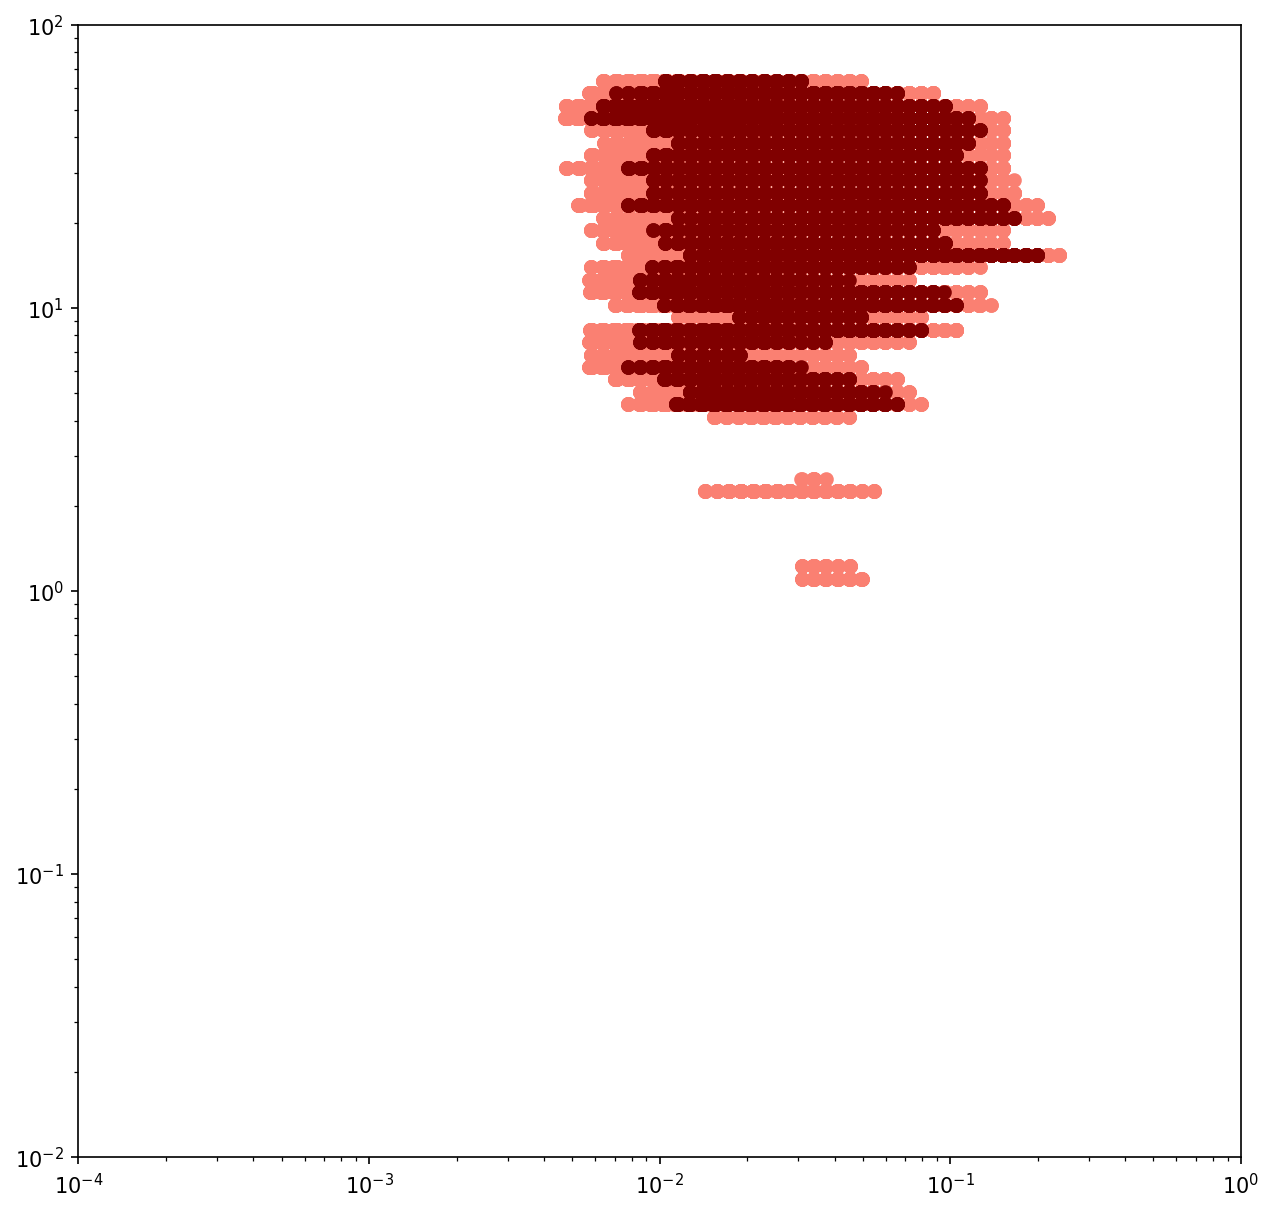

In [7]:
df_nt_90 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_90CL')
df_nt_99 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_99CL')

y = np.power(df_nt_99['m41'].values,2)
x = 4*np.power(np.cos(df_nt_99['theta14']),2)*np.power(np.sin(df_nt_99['theta24']),2)*(1-np.power(np.cos(df_nt_99['theta14']),2)*np.power(np.sin(df_nt_99['theta24']),2))

y1 = np.power(df_nt_90['m41'].values,2)
x1 = 4*np.power(np.cos(df_nt_90['theta14']),2)*np.power(np.sin(df_nt_90['theta24']),2)*(1-np.power(np.cos(df_nt_90['theta14']),2)*np.power(np.sin(df_nt_90['theta24']),2))

f=plt.figure(figsize=(10,10), dpi=150)
ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_ylim(.01,100.0)
ax.set_xlim(.0001,1)

plt.scatter(x,y,label='Hypervolume 99%',color=c_99)
plt.scatter(x1,y1,label='Hypervolume 90%',color=c_90)


f = ROOT.TFile("../build/jan28_ic_MUMUproc.root")
#f = ROOT.TFile("../Oct2020/ICexclude_MUMUproc.root")
tchi_90 = f.Get("numudis_90_excl")
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_90,dm2_90,c='mediumaquamarine',label='IC Excluded 90%')


ax.legend()

ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)

Text(0, 0.5, 'HV Entries')

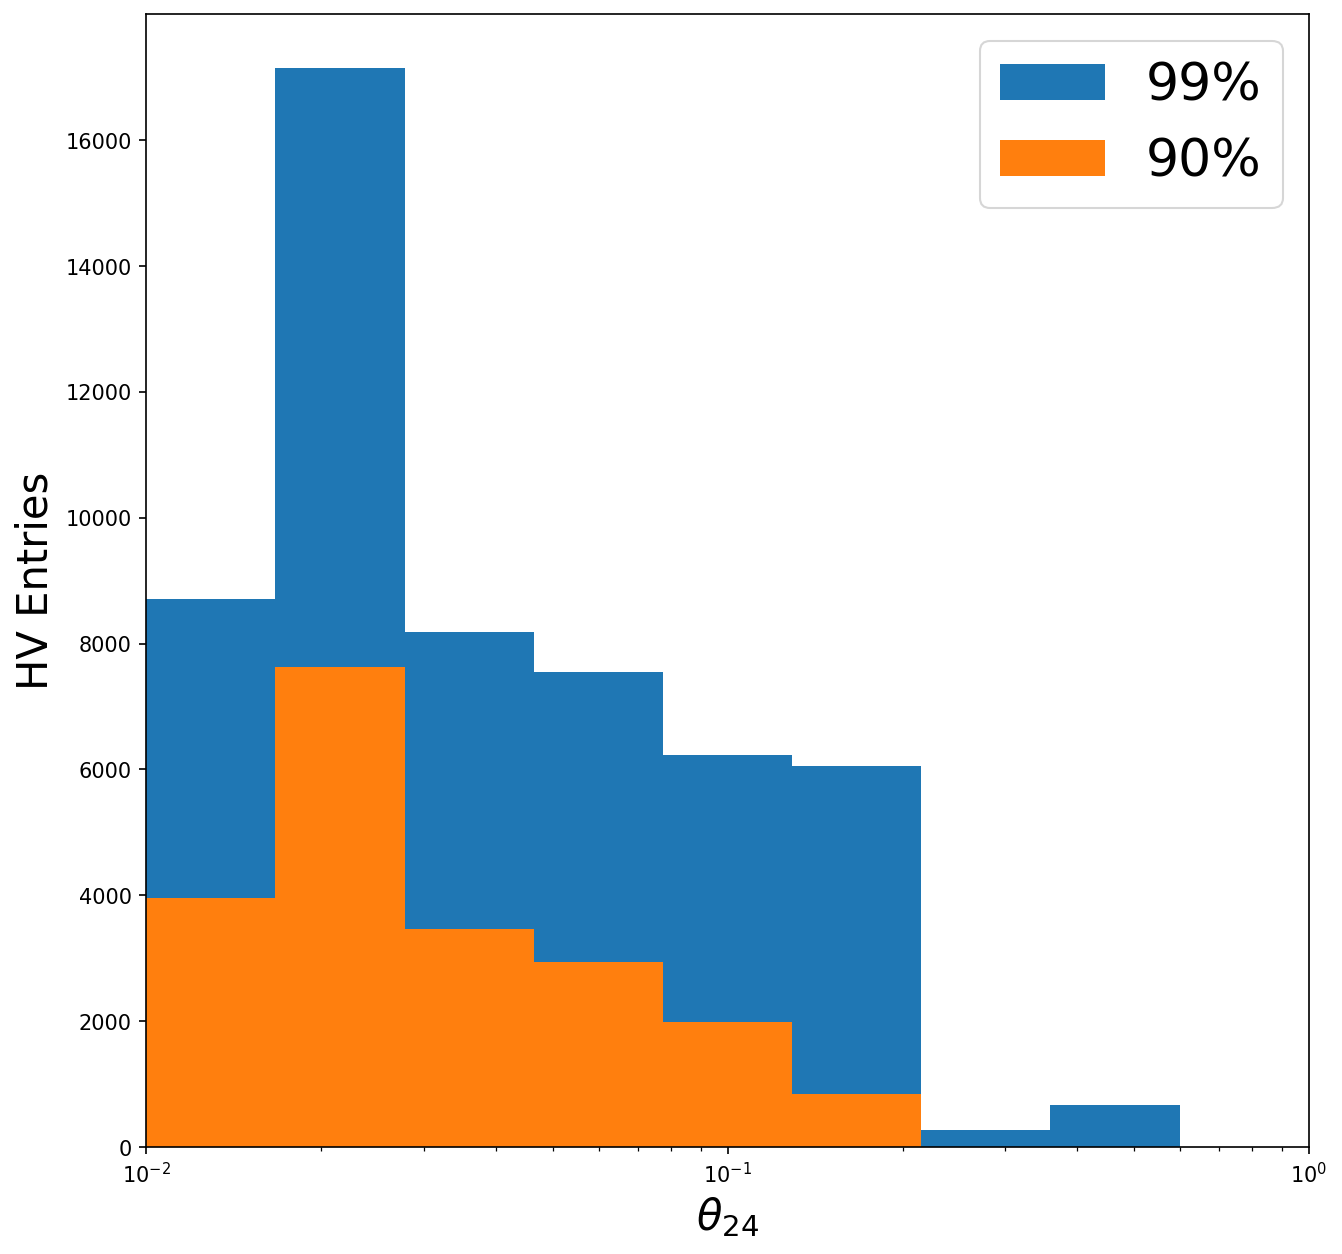

In [25]:
df_nt_90 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_90CL')
df_nt_99 = read_root('../build/FINAL_hypervolume_1_29_2021_finer.root','chi2_99CL')

y = np.power(df_nt_99['m41'].values,2)
x = np.power(np.sin(2*df_nt_99['theta24'].values),2)*np.power(np.sin(2*df_nt_99['theta14'].values),2)

y1 = np.power(df_nt_90['m41'].values,2)
x1 = np.power(np.sin(2*df_nt_90['theta24'].values),2)*np.power(np.sin(2*df_nt_90['theta14'].values),2)


f=plt.figure(figsize=(10,10), dpi=150)
ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')


ax.set_xlim(.01,1)



logbins = np.logspace(np.log10(.01),np.log10(1),10)
plt.hist(df_nt_99['theta34'],bins=logbins,label='99%')
plt.hist(df_nt_90['theta34'],bins=logbins,label='90%')

ax.legend(fontsize=25)

ax.set_xlabel(r'$\theta_{24}$',fontsize=20)
#ax.set_xlabel(r'$m_{41}$',fontsize=20)
ax.set_ylabel('HV Entries',fontsize=20)

No handles with labels found to put in legend.


8100

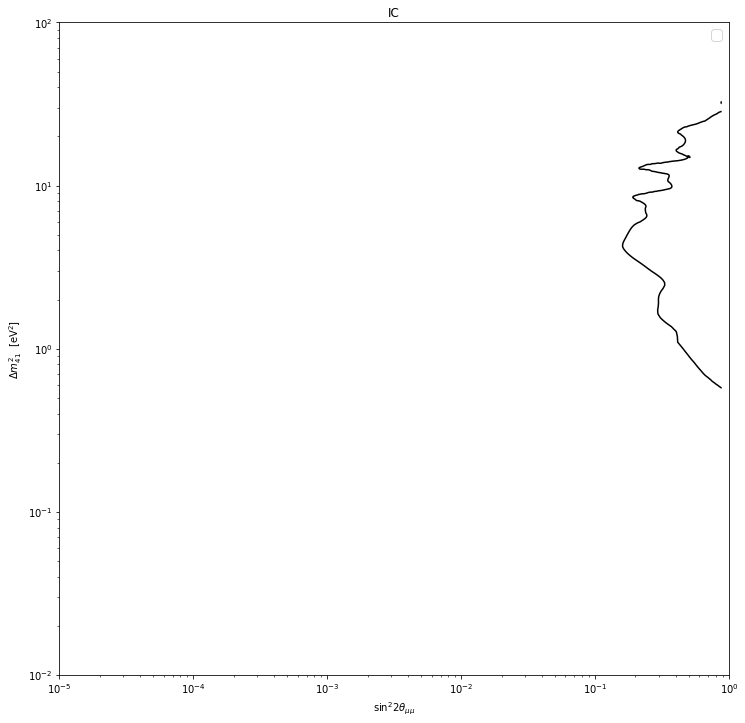

In [33]:
fig, ax = plt.subplots(figsize=(12,12))

#chiogram test
f = ROOT.TFile("../build/mbnubardis_val_jan20_MUMUproc.root")
tchi_c = f.Get("chiogram")
chi2_c, dm2_c, sin22th_c = getArrays(tchi_c)
#plt.scatter(sin22th_c,dm2_c, c=np.log10(chi2_c))
plt.title("IC")

getContour(sin22th_c,dm2_c,chi2_c,23.5)

ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

len(chi2_c)

In [14]:
np.log(chiot[:,3])

NameError: name 'chiot' is not defined

In [15]:
df_nt_90 = read_root('../build/hypervolume_11_13_2020.root','chi2_90CL')
df_nt_99 = read_root('../build/hypervolume_11_13_2020.root','chi2_99CL')

y = df_nt_99['m41']
x = df_nt_99['theta34']

y1 = np.power(df_nt_90['m41'].values,2)
x1 = df_nt_90['theta34']

fig, ax = plt.subplots(figsize=(12,12))

plt.scatter(x,y,label='Hypervolume 99%')
plt.scatter(x1,y1,label='Hypervolume 90%')

ax.set_ylim(.1,10)
ax.set_xlim(.01,np.pi/4)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.legend()

OSError: cannot read ../build/hypervolume_11_13_2020.root

Error in <TFile::TFile>: file ../build/hypervolume_11_13_2020.root does not exist


In [45]:
np.unique(df_nt_90['theta34'].values)

array([0.01043704, 0.01136924, 0.01238471, 0.01349087, 0.01469584,
       0.01600843])

# Global Plots

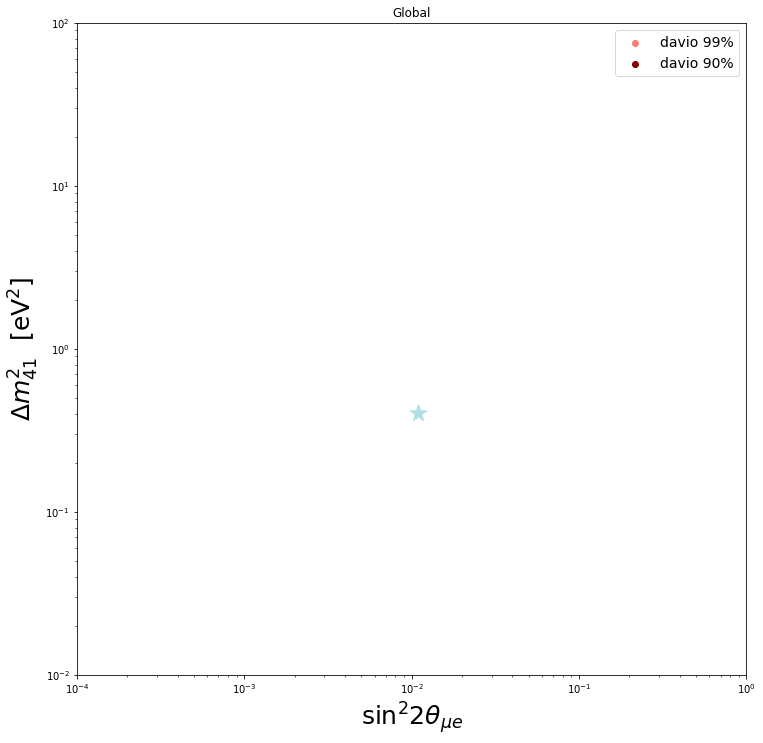

In [5]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../build/global_feb1_proc.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
 
plt.scatter(sin22th_99,dm2_99,c=c_99,label='davio 99%')
plt.scatter(sin22th_90,dm2_90,c=c_90,label='davio 90%')
     
#plt.scatter([0.0109339],[0.40698],marker="*",s=300,c='powderblue')    

plt.title("Global")
ax.legend(fontsize=14)

plt.xlim(1e-4,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

Text(0, 0.5, '$\\theta_{34}$')

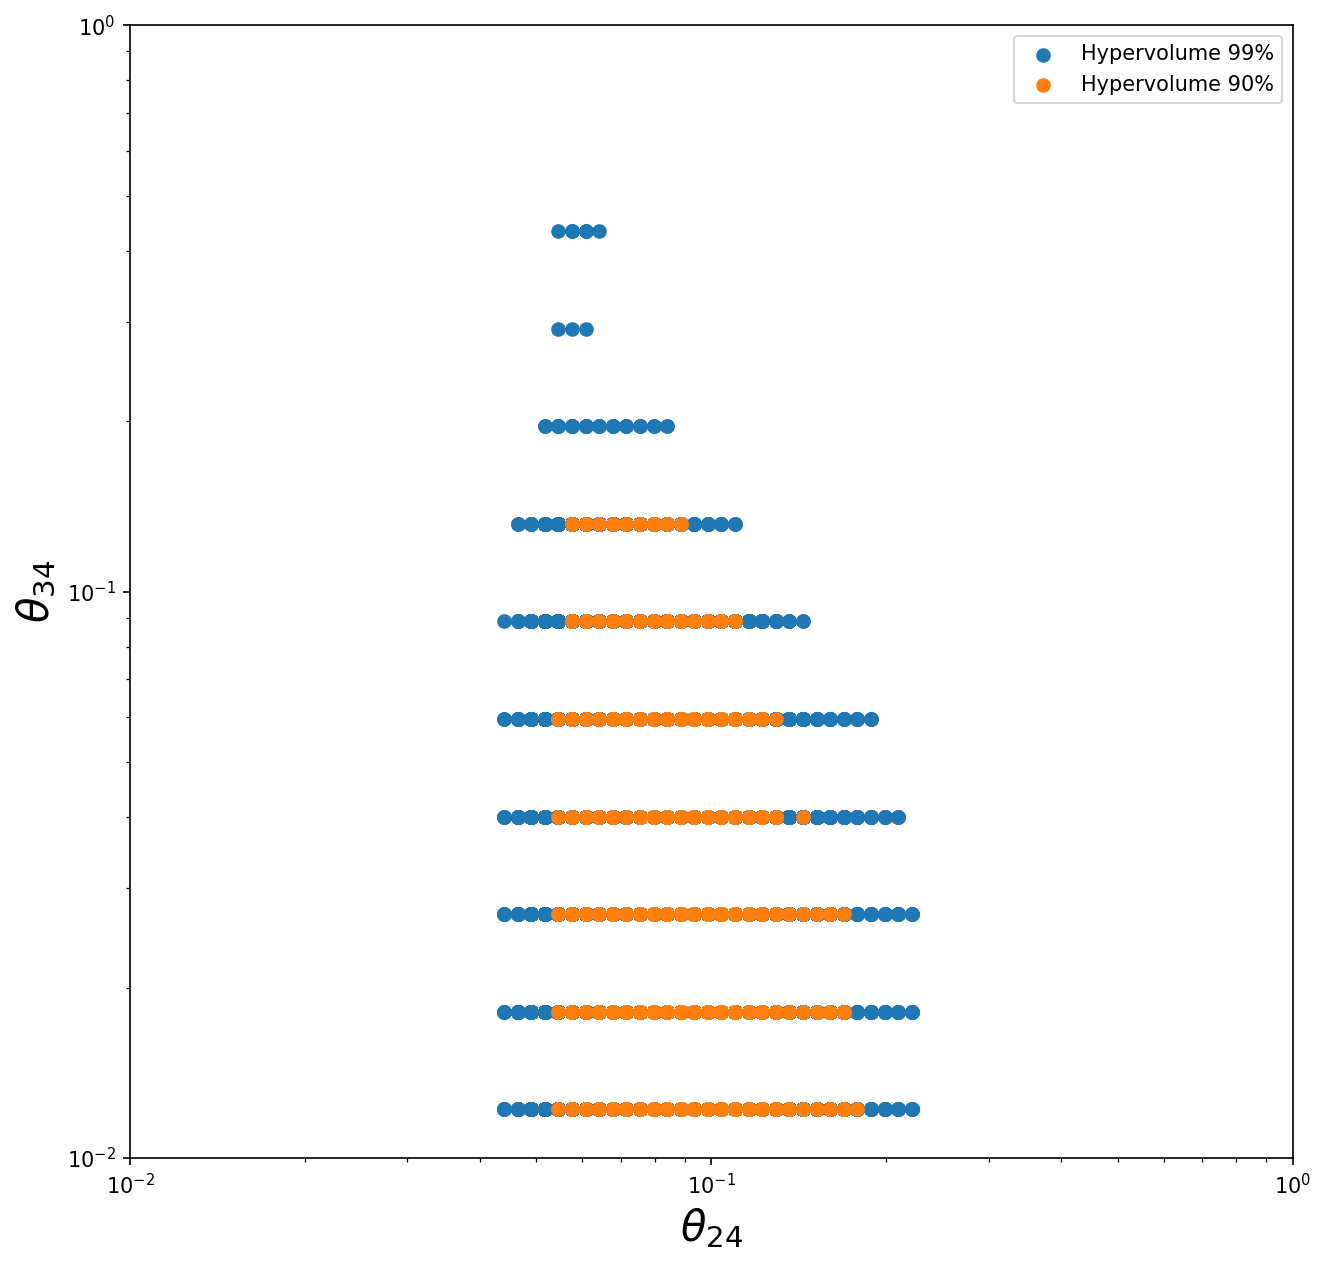

In [34]:
df_nt_90 = read_root('../Oct2020/hypervolume_12_16_2020_finer.root','chi2_90CL')
df_nt_99 = read_root('../Oct2020/hypervolume_12_16_2020_finer.root','chi2_99CL')

y = df_nt_99['theta34']
x = df_nt_99['theta24']

y1 = df_nt_90['theta34']
x1 = df_nt_90['theta24']


f=plt.figure(figsize=(10,10), dpi=150)
ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_ylim(.01,1)
ax.set_xlim(.01,1)

plt.scatter(x,y,label='Hypervolume 99%')
plt.scatter(x1,y1,label='Hypervolume 90%')

ax.legend()

ax.set_xlabel(r'$\theta_{24}$',fontsize=20)
ax.set_ylabel(r'$\theta_{34}$',fontsize=20)

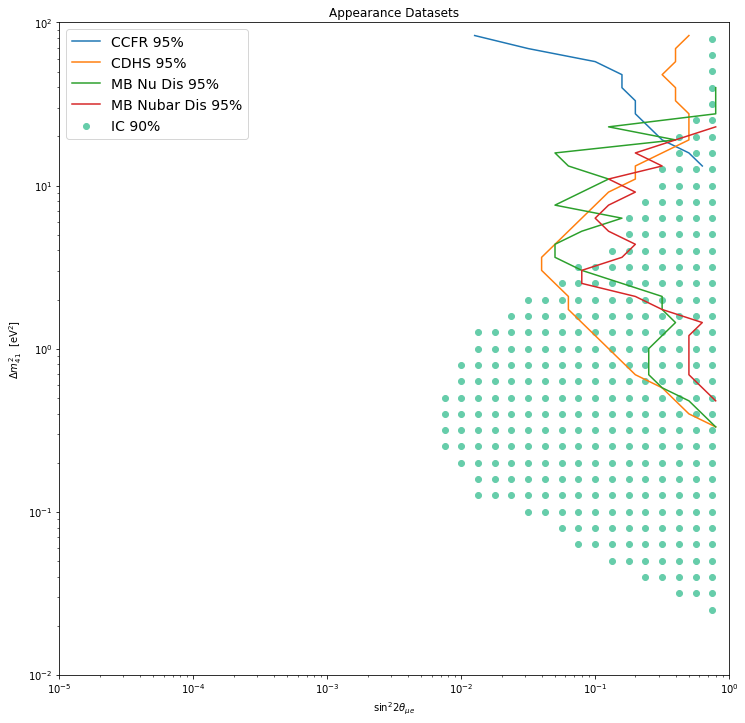

In [13]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../build/ICexclude_MUMUproc.root")
tchi_90 = f.Get("numudis_90_excl")
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_90,dm2_90,c='mediumaquamarine',label='IC 90%')
plt.title("Appearance Datasets")

f = ROOT.TFile("../Oct2020/CCFR_MUMUproc.root")
tchi_95 = f.Get("numudis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='CCFR 95%')

# CDHS
f = ROOT.TFile("../Oct2020/CDHS_MUMUproc.root")
tchi_95 = f.Get("numudis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='CDHS 95%')

f = ROOT.TFile("../Oct2020/MBnu_dis_MUMUproc.root")
tchi_95 = f.Get("numudis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='MB Nu Dis 95%')

f = ROOT.TFile("../Oct2020/MBnubar_dis_MUMUproc.root")
tchi_95 = f.Get("numudis_95")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='MB Nubar Dis 95%')

ax.legend(fontsize=14)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]')
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [6]:
numumc = np.genfromtxt('../data/miniboone_dis/numudisap_ntuple.txt')
binning = np.genfromtxt('../data/miniboone_dis/miniboone_binboundaries_disap.txt')
numudata = np.genfromtxt('../data/miniboone_dis/miniboone_numudata_disap.txt')

In [9]:
mcint = numumc[:,4].sum()
dataint = numudata.sum()

[0.80961159 0.91472567 0.97394294 1.01503961 1.02474438 1.03721359
 1.07201696 1.03402623 1.03444158 1.03653169 0.99614703 1.01783151
 0.9806953  0.98841184 0.97317978 1.05406767]


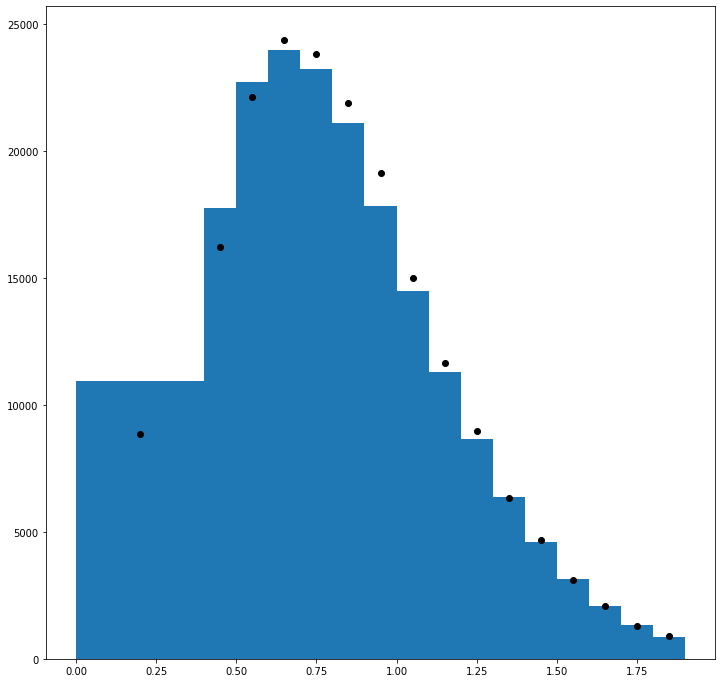

In [16]:
fig, ax = plt.subplots(figsize=(12,12))

_ = plt.hist(numumc[:,1],bins=binning,weights=numumc[:,4]*dataint/mcint,zorder=1)
plt.scatter(binning[:-1]+np.diff(binning)/2,numudata,c='black',zorder=3)

print(np.divide(numudata,_[0]))

In [12]:
numubarmc = np.genfromtxt('../data/miniboone_dis/numubardisap_ntuple.txt')
numubardata = np.genfromtxt('../data/miniboone_dis/miniboone_numubardata_disap.txt')

In [13]:
mcintbar = numubarmc[:,4].sum()
dataintbar = numubardata.sum()

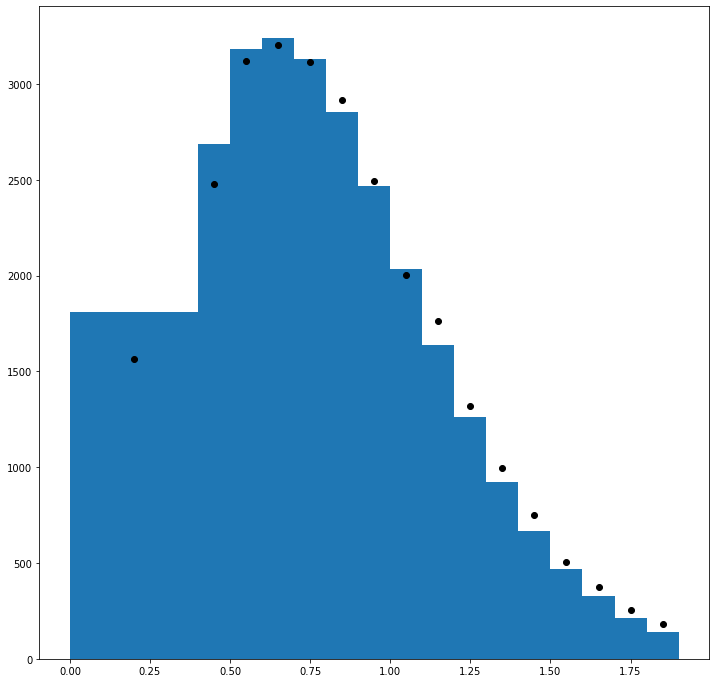

In [14]:
fig, ax = plt.subplots(figsize=(12,12))

plt.hist(numubarmc[:,1],bins=binning,weights=numubarmc[:,4]*dataintbar/mcintbar,zorder=1)
plt.scatter(binning[:-1]+np.diff(binning)/2,numubardata,c='black',zorder=3)

In [18]:
nuemc = np.genfromtxt('../data/miniboone/NueBG_binContent_2020.txt')
binning = np.genfromtxt('../data/miniboone/binBoundaries_2020.txt')
nuedata = np.genfromtxt('../data/miniboone/NueData_binContent_2020.txt')

In [23]:
nuemc

array([527.165, 315.424, 349.645, 186.212, 261.442, 195.534, 203.009,
       165.664, 150.537, 112.033, 201.45 ])

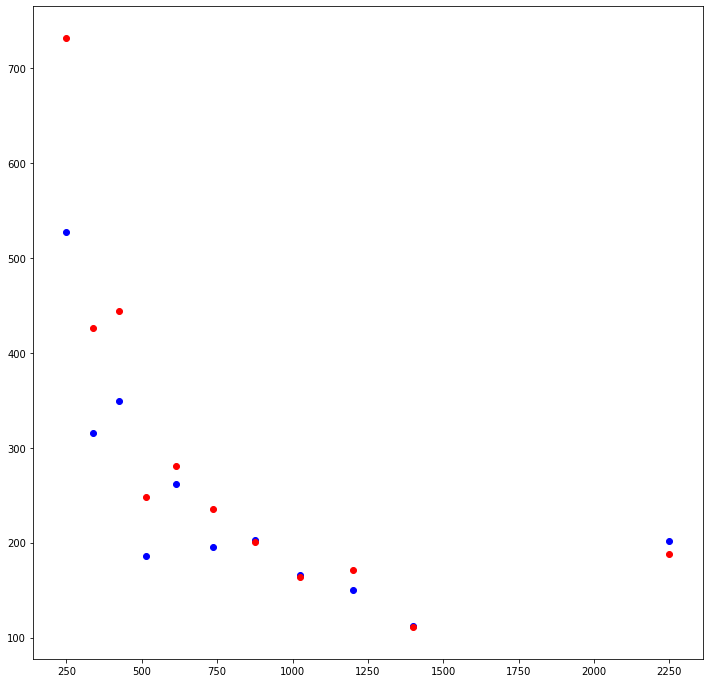

In [24]:
fig, ax = plt.subplots(figsize=(12,12))

plt.scatter(binning[:-1]+np.diff(binning)/2,nuemc,c='blue',zorder=3)
plt.scatter(binning[:-1]+np.diff(binning)/2,nuedata,c='red',zorder=3)